# House Pricing Prediction Portfolio



# Part 1 - Defining the problem that needs to be solved

Every one needs an enjoyable, happy place where you can live, laugh and learn. This is usually called HOME. Getting the correct evaluation for a house is very important as it is a major investment that is consequential for both the buyers and sellers.

There are various factors that influence the pricing of a house.

The goal of this portfolio is predicting prices for set of houses with reliable accuracy by examining details of features provided in a train data set.

### 1.1 Import Libraries

In [1]:
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.ticker import MaxNLocator
import seaborn as sns

#Preprocessing
from sklearn import preprocessing

#Models & Sklearn packages
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfregr
from sklearn.ensemble import GradientBoostingRegressor as grbregr
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, './scripts')

#read in functions from script file
from codes import eda_process, model

from tqdm import tqdm
import datetime

import warnings
warnings.filterwarnings('ignore')
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

### 1.2 Define Classes

Classes defined in "codes.py" module under script folder in working directory

## Part 2 - Data Discovery

### 2.1 Load Data 

In [2]:
#load the data into a Pandas dataframe
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

### 2.2 Examine & Get Insights on Data 

2.2.1 Inspecting the training dataset

In [3]:
#print the top 5 rows of training data
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#print the descriptive statistics of the numerical data
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
train_df.select_dtypes(include=['object']).describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

Observations:

1. Null values exist in the training dataset
2. Id column seems to have unique values identifying each row which will add no value to modelling, possibly need to drop from the data.

In [6]:
#print the summary of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observations:

1. The training data has 1460 rows and 81 features.
2. There are 38 numerical and 43 categorical data.

2.2.2 Inspecting the testing data set

In [7]:
#print the top 5 rows of training data
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
#print the descriptive statistics of the numerical data
test_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [9]:
test_df.select_dtypes(include=['object']).describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1459   107     1459        1459      1457      1459   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1114   1453    70      934        1311      1457      1081   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1459         1459       1459  ...       1383         1381   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1396          218       1251  ...        853          625   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1381       1381       1459      3    290          51     1458   
unique          4          5          3      2      4           3        9   
top            TA         TA          Y     Ex  MnPrv        Shed       WD   
freq         1293       1328       1301      2    172          46     1258   

       SaleCondition  
count           1459  
unique             6  
top           Normal  
freq            1204  

[4 rows x 43 columns]

Observations:

1. Null values exist in the testing dataset
2. Id column seems to have unique values identifying each row which will add no value to modelling, possibly need to drop from the data.

In [10]:
#print the summary of the columns
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Observations:

1. The testing data has 1459 rows and 80 features.
2. There are 37 numerical and 43 categorical data.

### 2.3 Cleaning data

2.3.1 Checking for duplicates in both training and testing datasets and dropping applicable column

In [11]:
#Create a copy of data before starting cleaning process
train_df_init = train_df.copy()
test_df_init = test_df.copy()

In [12]:
#Checking for duplicated Id in training data
train_df['Id'].is_unique

True

In [13]:
#dropping Id column in training dataset (it is not useful for modelling)
train_df.drop(columns =['Id'], inplace=True)
train_df.shape

(1460, 80)

In [14]:
#Checking for duplicated Id in testing data
test_df['Id'].is_unique

True

In [15]:
#dropping Id column in testing dataset (it is not useful for modelling)
test_df.drop(columns =['Id'], inplace=True)
test_df.shape

(1459, 79)

2.3.2 Checking for null data in both training and testing datasets and address accordingly

Percentage of missing values in each column:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


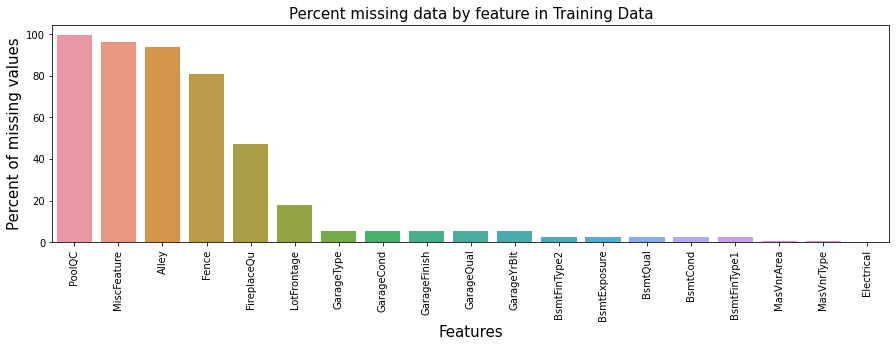

In [16]:
#print the percentage of missing data for columns with missing data in the training dataset
missing_values = eda_process(train_df)
missing_values.perc_missing_data('Training Data')

Observations:

1. The training dataset have 19 features with null values that will require further investigation to determine how to handle them. 

Percentage of missing values in each column:
PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageCond       5.35
GarageFinish     5.35
GarageYrBlt      5.35
GarageQual       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14
Utilities        0.14
Functional       0.14
BsmtFullBath     0.14
BsmtFinSF2       0.07
BsmtFinSF1       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
Exterior2nd      0.07
SaleType         0.07
Exterior1st      0.07
KitchenQual      0.07
GarageArea       0.07
GarageCars       0.07
dtype: float64


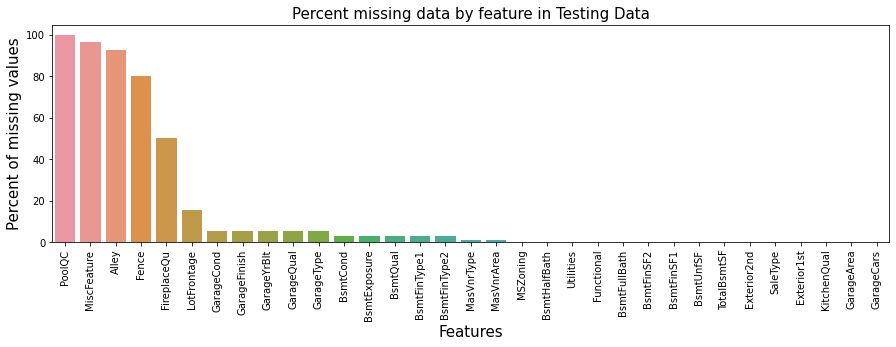

In [17]:
#print the percentage of missing data for columns with missing data in the testing dataset
missing_values = eda_process(test_df)
missing_values.perc_missing_data('Testing Data')

Observations:

1. The testing dataset has 33 features with null values that will require further investigation to determine how to handle them. 

2.3.3 Dealing with identified null data in both training and testing datasets.

Different approaches will be applied to columns after further investigation fo the data with null values:
     1. Columns where missing values actually mean None. Null values will be replaced with "None".
     2. Numerical columns where missing values actually mean 0. Null values will be replaced with "0".
     3. Columns that missing data is not possible and low number of missing data. Null values to be filled with column mode.
     4. Critical data that can be related with another column. Null values to be filled with mode value of the highly correlable column. 

2.3.3.1 Fixing Null Values in Training Dataset

In [18]:
#Null value Clean up Approach 1 applied in training dataset
None_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
none_replace = eda_process(train_df)
none_replace.deal_null_values(None_cols, 'None')

In [19]:
#Null value Clean up Approach 2 applied in training dataset
zero_cols = ['GarageYrBlt', 'MasVnrArea']
none_replace = eda_process(train_df)
none_replace.deal_null_values(zero_cols, 0)

In [20]:
#Null value Clean up Approach 3 applied in training dataset
freq_cols = ['Electrical']
none_replace = eda_process(train_df)
none_replace.deal_null_values(freq_cols, train_df['Electrical'].mode()[0])

In [21]:
#Null value Clean up Approach 4 applied in training dataset Filling 'LotFrontage' according to Neighborhood.
train_df['LotFrontage'] = train_df.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

2.3.3.2 Fixing Null Values in Testing Dataset

In [22]:
#Null value Clean up Approach 1 applied in testing dataset
None_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
none_replace = eda_process(test_df)
none_replace.deal_null_values(None_cols, 'None')

In [23]:
#Null value Clean up Approach 2 applied in testing dataset
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
none_replace = eda_process(test_df)
none_replace.deal_null_values(zero_cols, 0)

In [24]:
#Null value Clean up Approach 3 applied in testing dataset
freq_cols = ['Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities']
none_replace = eda_process(test_df)
none_replace.deal_null_values_freq(freq_cols)

In [25]:
#Null value Clean up Approach 4 applied in training dataset Filling 'LotFrontage' according to Neighborhood.
test_df['LotFrontage'] = test_df.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [26]:
test_df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [27]:
test_df['MSZoning'] = test_df['MSZoning'].fillna('RL')

2.3.4 Visualize data to check and remove invalid target data

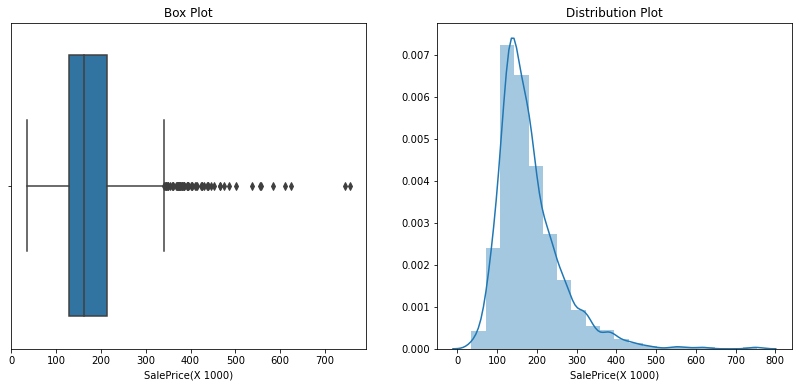

In [28]:
Target_plot = eda_process(train_df.SalePrice)
Target_plot.target_visual('SalePrice')

2.3.4.1 Checking for potential outliers using the IQR rule

In [29]:
# Identify potential outliers
info = train_df.SalePrice.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
The upper and lower bounds for suspected outliers are 340037.5 and 3937.5.


2.3.4.2 Investigate identified outliers

In [30]:
#checking lower bound suspected outliers 
train_df[train_df.SalePrice < 3937.5].count()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [31]:
#checking upper bound suspected outliers 
train_df[train_df.SalePrice > 340037.5].count()

MSSubClass       61
MSZoning         61
LotFrontage      61
LotArea          61
Street           61
                 ..
MoSold           61
YrSold           61
SaleType         61
SaleCondition    61
SalePrice        61
Length: 80, dtype: int64

In [32]:
#checking upper bound suspected outliers 
train_df[train_df.SalePrice > 340037.5]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11            60       RL         85.0    11924   Pave  None      IR1   
53            20       RL         68.0    50271   Pave  None      IR1   
58            60       RL         66.0    13682   Pave  None      IR2   
112           60       RL         77.0     9965   Pave  None      Reg   
151           20       RL        107.0    13891   Pave  None      Reg   
...          ...      ...          ...      ...    ...   ...      ...   
1268          50       RL         74.0    14100   Pave  None      IR1   
1353          50       RL         56.0    14720   Pave  None      IR1   
1373          20       RL         91.0    11400   Pave  None      Reg   
1388          20       RL         42.0    14892   Pave  None      IR1   
1437          20       RL         96.0    12444   Pave  None      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
11           Lvl    AllPub    Inside  ...        0   None  None        None   
53           Low    AllPub    Inside  ...        0   None  None        None   
58           HLS    AllPub   CulDSac  ...        0   None  None        None   
112          Lvl    AllPub    Inside  ...        0   None  None        None   
151          Lvl    AllPub    Inside  ...        0   None  None        None   
...          ...       ...       ...  ...      ...    ...   ...         ...   
1268         Lvl    AllPub    Inside  ...        0   None  GdWo        None   
1353         Lvl    AllPub   CulDSac  ...        0   None  None        None   
1373         Lvl    AllPub    Inside  ...        0   None  None        None   
1388         HLS    AllPub   CulDSac  ...        0   None  None        None   
1437         Lvl    AllPub       FR2  ...        0   None  None        None   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
11         0      7    2006       New        Partial     345000  
53         0     11    2006        WD         Normal     385000  
58         0     10    2006       New        Partial     438780  
112        0     10    2007       New        Partial     383970  
151        0      1    2008       New        Partial     372402  
...      ...    ...     ...       ...            ...        ...  
1268       0      5    2008        WD         Normal     381000  
1353       0      3    2010        WD         Normal     410000  
1373       0      3    2007        WD         Normal     466500  
1388       0     10    2009        WD         Normal     377500  
1437       0     11    2008       New        Partial     394617  

[61 rows x 80 columns]

In [33]:
train_df[train_df.SalePrice > 340037.5].groupby(['YearBuilt']).size()

YearBuilt
1892     1
1934     1
1935     1
1965     1
1972     1
1981     1
1992     1
1993     1
1994     2
1995     4
1996     1
1997     1
2001     1
2003     5
2004     2
2005     6
2006    10
2007     5
2008    11
2009     4
2010     1
dtype: int64

In [34]:
train_df[train_df.SalePrice > 340037.5].groupby(['Neighborhood']).size()

Neighborhood
CollgCr     2
Crawfor     3
Gilbert     1
NAmes       1
NoRidge    11
NridgHt    27
OldTown     1
Somerst     2
StoneBr     9
Timber      3
Veenker     1
dtype: int64

Observations:

1. The 61 properties with SalePrice higher than the upper bounds are mostly:
   - MSSubClass - 20 & 60 
   - Residential Low Density in NridgHt, NoRidge & StoneBr Neighborhoods.
   - LotAreas higher than the mean LotArea size
   - Built in the 2000s.

2.3.5 Checking numerical features for outliers using the bivariate analysis method

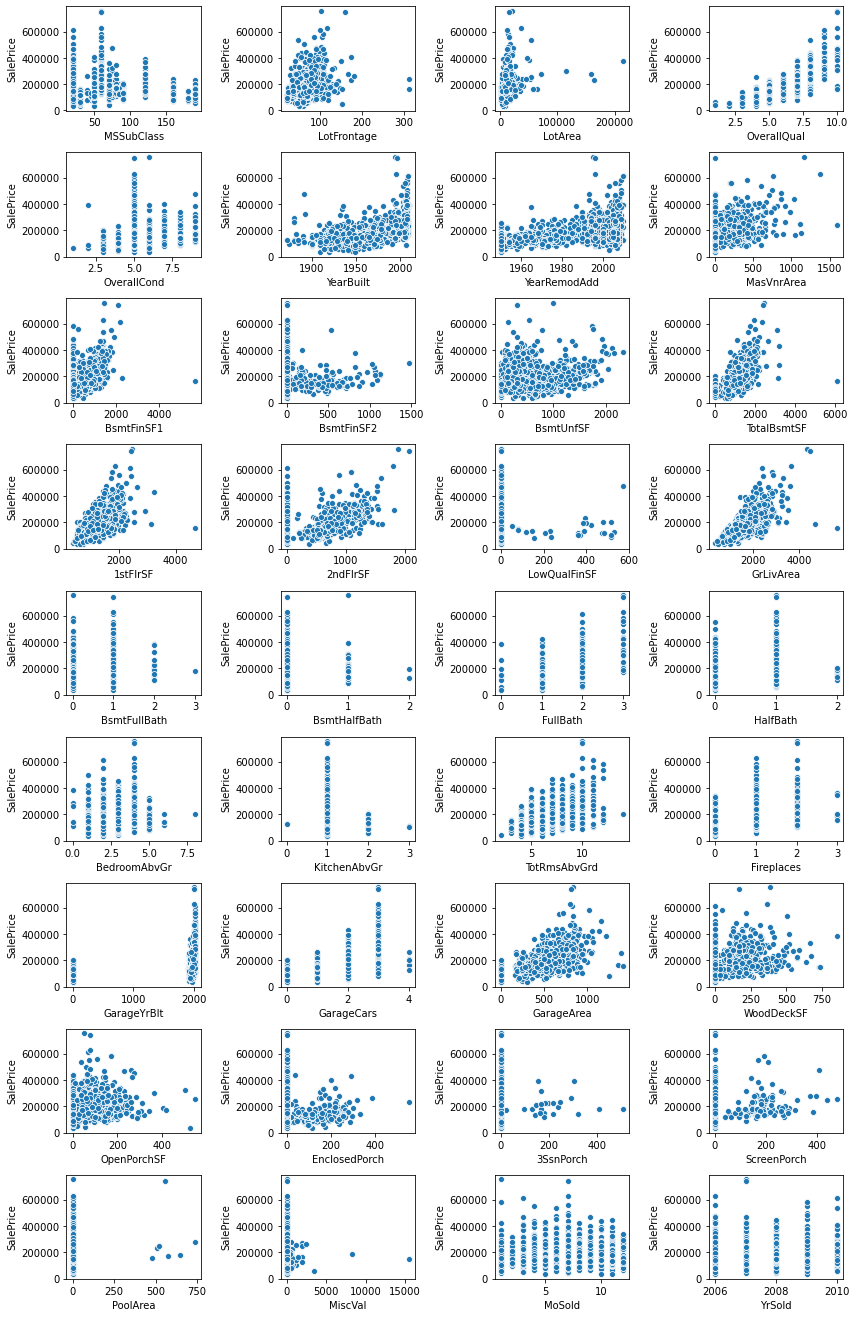

In [35]:
#Numeric features inspection for outliers
num_bivariate_plot = eda_process(train_df)
num_bivariate_plot.num_features_outliers()

Observations:
1. Following features appear to have outliers based on scatter plots above.
   - LotFrontage (> 200), Lot Area (> 100000), BsmtFinSF1 (> 4000), TotalBsmtSF (>4000), 1stFlrSF (> 4000)

2.3.5.1 Dropping identified outliers from training data

In [36]:
#dropping identified outliers 
train_df = train_df.drop(train_df['LotFrontage'][train_df['LotFrontage']>200].index)
train_df = train_df.drop(train_df['LotArea'][train_df['LotArea']>100000].index)
train_df = train_df.drop(train_df['BsmtFinSF1'][train_df['BsmtFinSF1']>4000].index)
train_df = train_df.drop(train_df['TotalBsmtSF'][train_df['TotalBsmtSF']>4000].index)
train_df = train_df.drop(train_df['1stFlrSF'][train_df['1stFlrSF']>4000].index)

### 2.4 Exploring data (EDA)

2.4.1 Checking numerical features for correlation

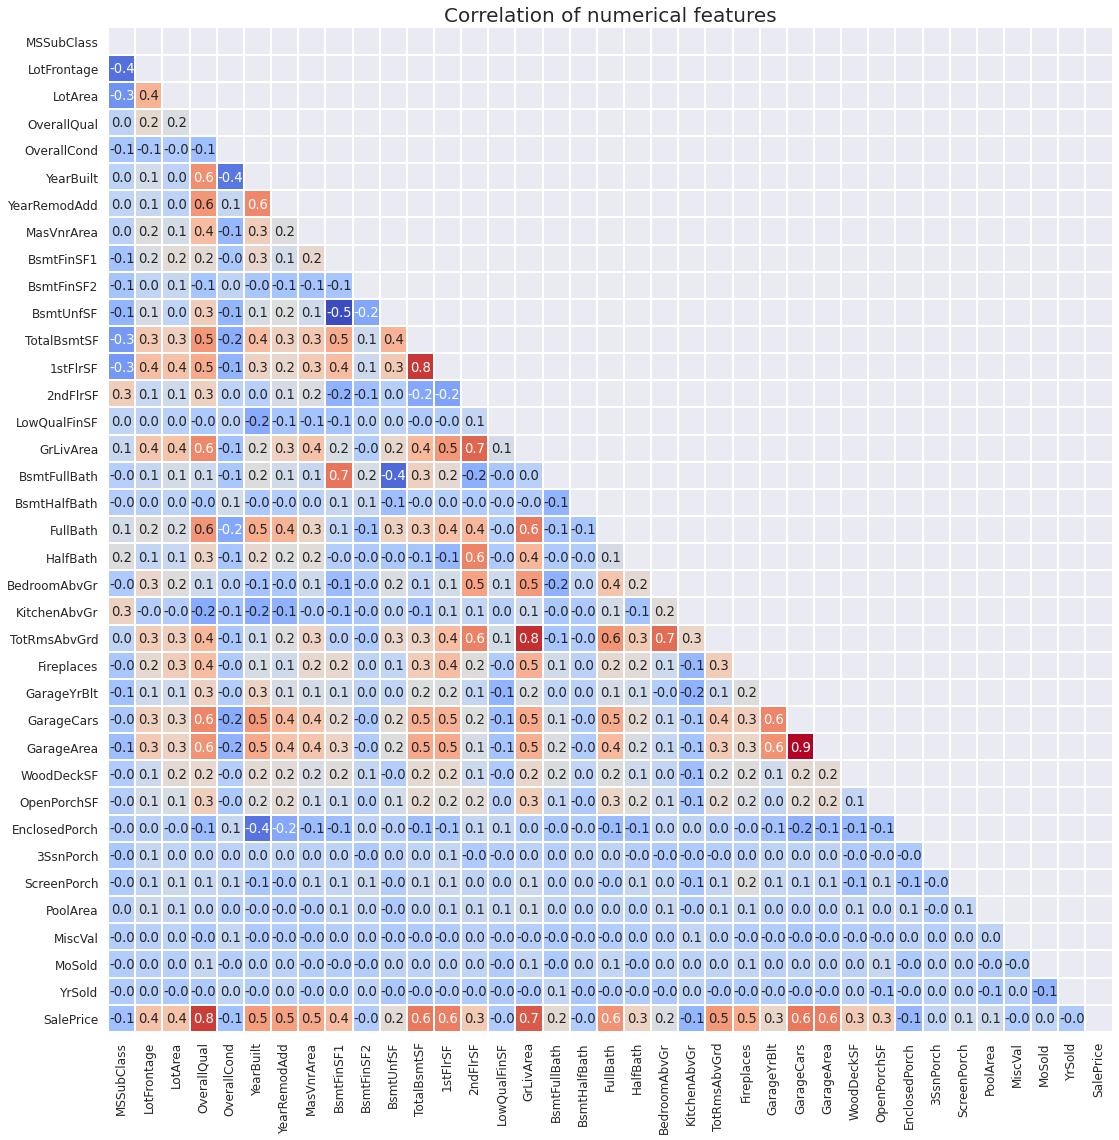

In [37]:
#Heatmap for numerical features correlation in Training Dataset
num_feature_corr = eda_process(train_df)
num_feature_corr.heatmap_num('numerical features')

Observations: 

1. The heat map shows OverallQual, GrLivArea, FullBath, GarageCars have the highest correlation to SalePrice in that order.
2. The following features will be excluded due to high correlation to other features that are highly correlated to SalePrice-
        - GarageArea- highly correlated to Garage Cars
        - 1stFlrSF- highly correlated to TotalBsmtSF
        - GarageYrBlt - highly correlated to YearBuilt
        - TotRmsAbvGrd - highly correlated to GrLivArea
3. Following features to be excluded due to correlation to SalePrice < threshold of 0.3 selected  - 
        MSSubClass,  OverallCond, BsmtFinSF2, BsmtUnfSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, BedroomAbvGr, 
        KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold.

2.4.2 Drop numerical features identified in section 2.4.1 from both training and testing data

In [38]:
#Drop numerical features in both training and testing data
features = ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
num_datadrop = eda_process(train_df)
num_datadrop.data_drop(train_df, test_df, features)

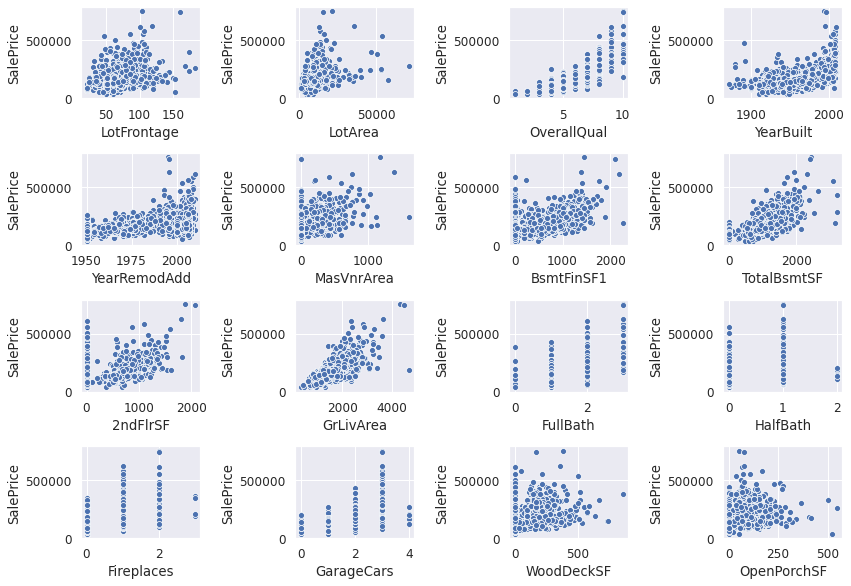

In [39]:
#Numeric features inspection for outliers
num_bivariate_plot = eda_process(train_df)
num_bivariate_plot.num_features_outliers()

2.4.3 Checking categorical features for correlation

In [40]:
#Creating a copy of training data to use for categorical feature correlation analysis
analysis_data = train_df.copy()

In [41]:
#convert all categorical features into category dtype for correlation analysis
features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
analysis_data[features]=analysis_data[features].astype('category')
analysis_data.dtypes

MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
TotalBsmtSF         int64
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
2ndFlrSF    

The following functions are applied to all columns of the dataframe and encodes the subcategories with the mean of the salary of each category respectively.

In [42]:
def encode_label(df, col):
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['SalePrice'].mean()
    df[col] = df[col].map(cat_dict)

In [43]:
#apply the encode_label function on categorical data
for col in analysis_data.columns:
  if analysis_data[col].dtype.name == 'category':
    encode_label(analysis_data, col)

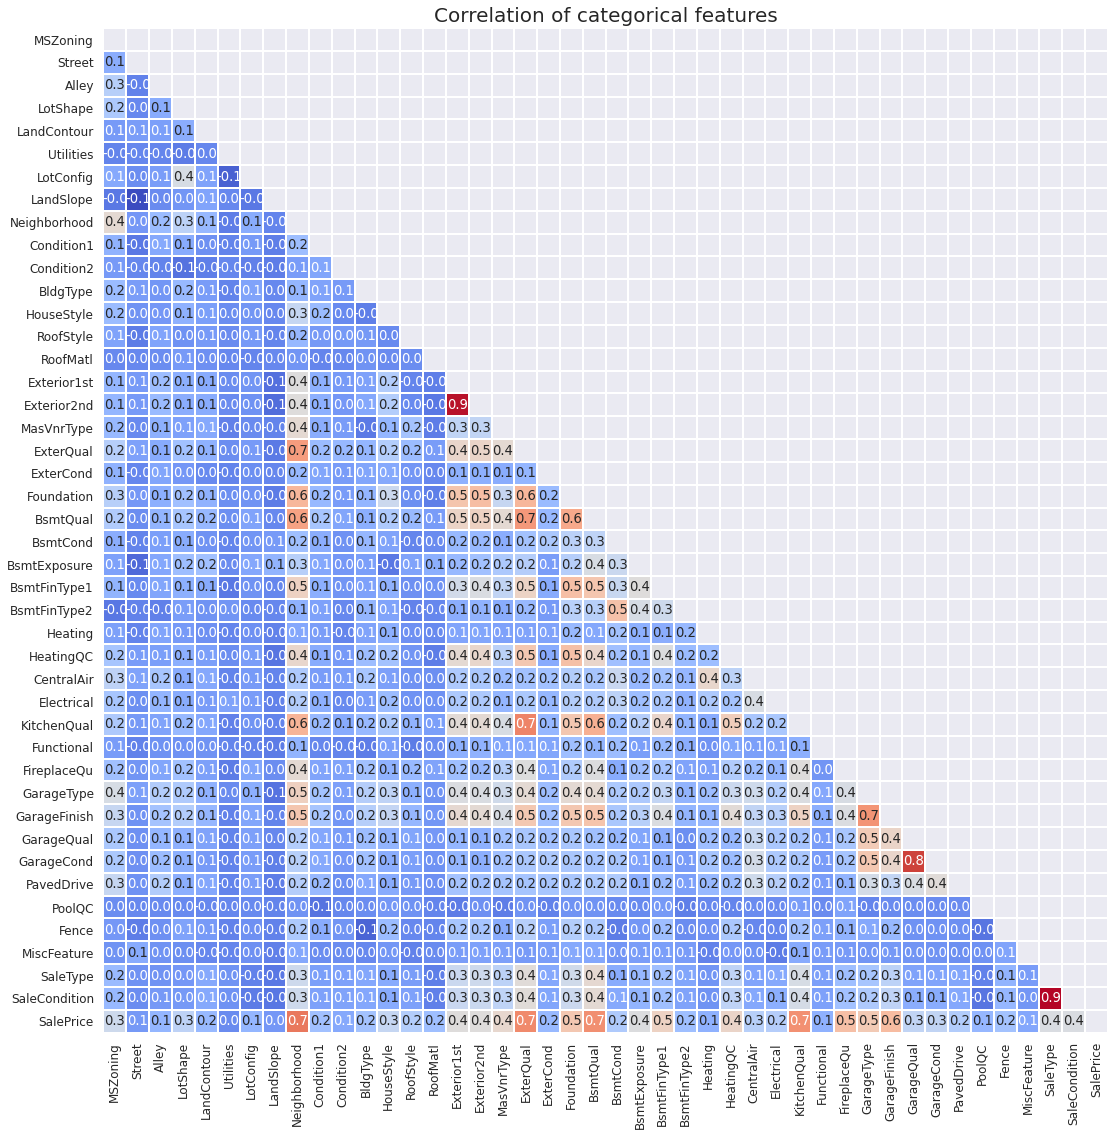

In [44]:
#Heatmap for categorical features correlation
cat_feature_corr = eda_process(analysis_data[features + ['SalePrice']])
cat_feature_corr.heatmap('categorical features')

Observations: 

1. The heat map shows Neighborhood, ExternalQual, BsmtQual, KitchenQual have the highest correlation to SalePrice
2. The following features will be excluded due to high correlation to other features that are highly correlated to SalePrice-
        - Sale Condition- highly correlated to SaleType
        - Exterior2nd- highly correlated to Exterior1st
3. Following features to be excluded due to correlation yto SalePrice < threshold of 0.2 selected - 
       Street, Alley, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgType, RoofStyle, RoofMatl, 
       ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Electrical, Functional, PavedDrive, PoolQC, Fence, 
       MiscFeature. 

2.4.4 Drop categorical features identified in section 2.4.4 from both training and testing data

In [45]:
#Drop categorical features in both training and testing data
features = ['Street', 'Alley', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition']
cat_datadrop = eda_process(train_df)
cat_datadrop.data_drop(train_df, test_df, features)

2.4.5 Checking for relationship between the categorical features and SalePrice

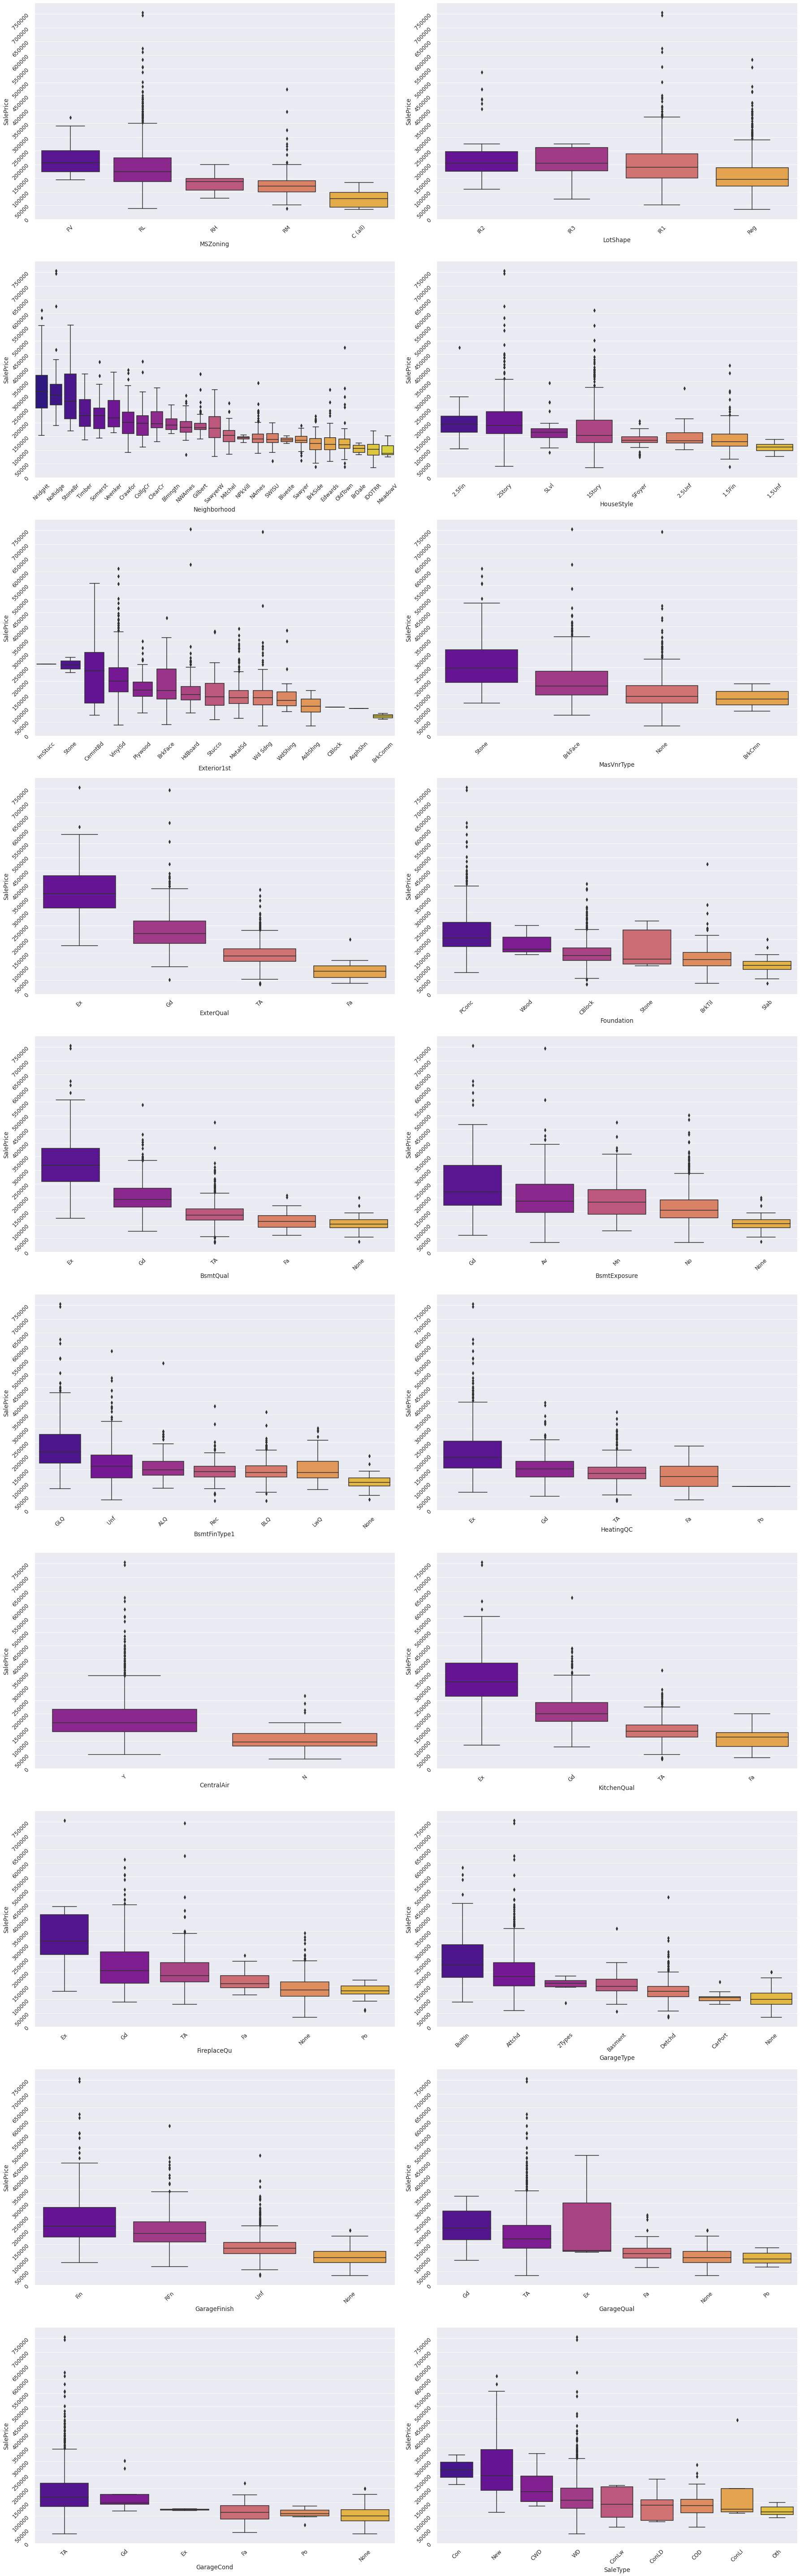

In [46]:
#Plot to inspect relationshop between categorical features and SalePrice
cat_plot = eda_process(train_df)
cat_plot.cat_features_plot('SalePrice')

2.4.6 Inspecting numerical features columns for skewness in both training and testing datasets

2.4.6.1 Inspecting for skewness in both training dataset

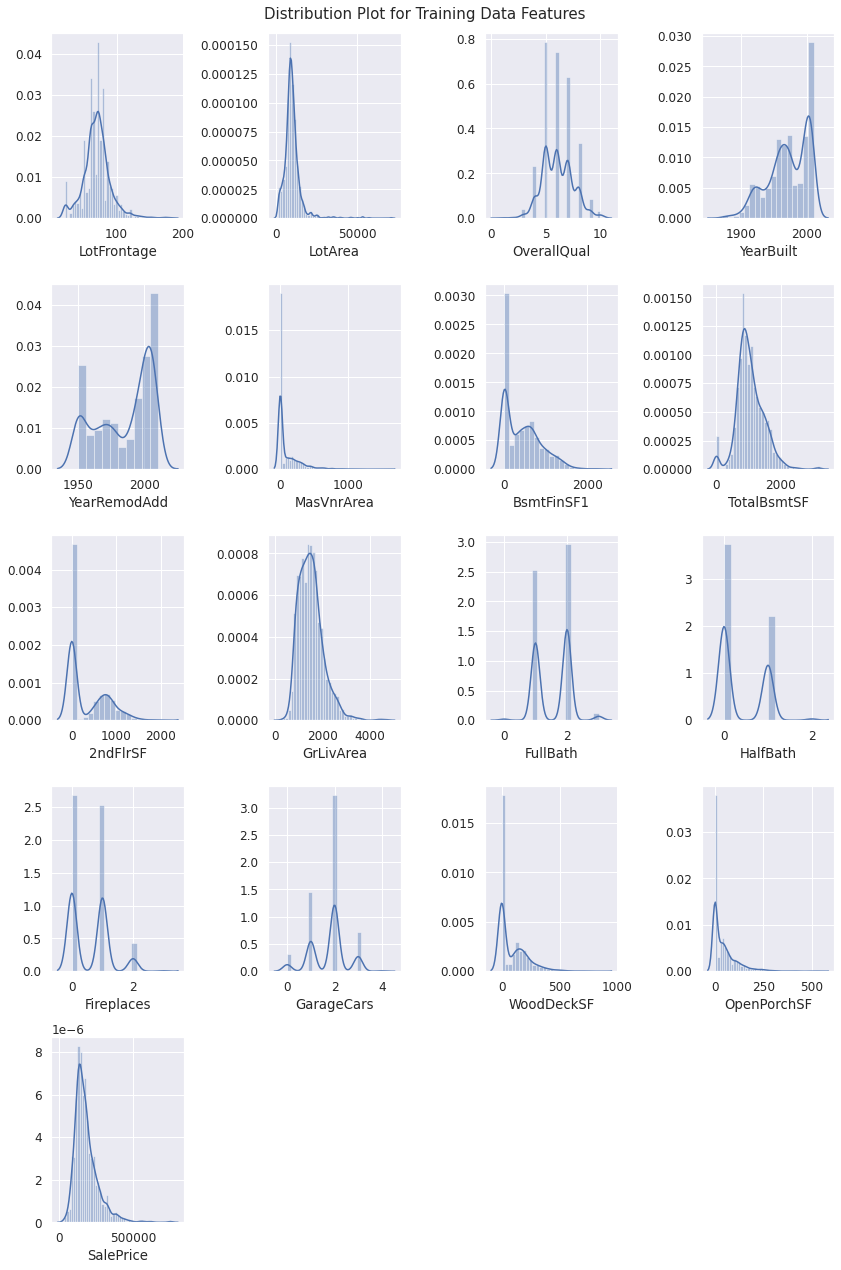

In [47]:
#Numeric features inspection for skewness in training dataset
num_distribution_plot = eda_process(train_df)
num_distribution_plot.num_features_distplot('Training Data')

Observations:
1. There are 3 features identified with uni-modal, skewed distributions could potentially be log transformed.
          - SalePrice, LotArea, & GrLivArea.

SalePrice has a skew of 1.9 while the log-transformed SalePrice improves the skew to 0.13


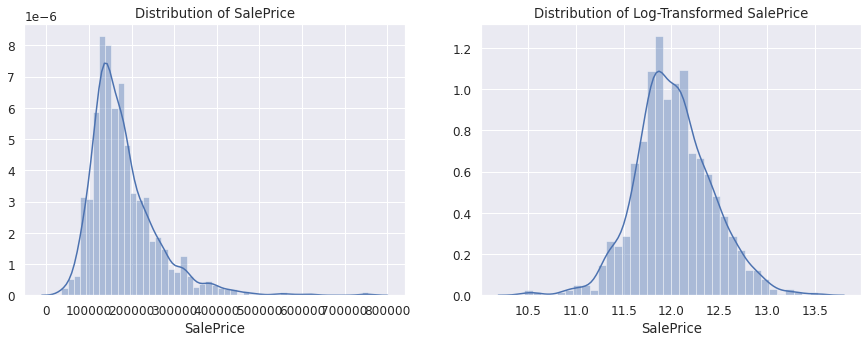

In [48]:
#SalePrice inspection for skewness
plot = eda_process(train_df.SalePrice)
plot.dist_plot('SalePrice')

Observation: Log Transformation of the identified variables minimizes the skewness in the data. Consider log transformation during feature engineering.

2.4.6.2 Inspecting for skewness in testing dataset

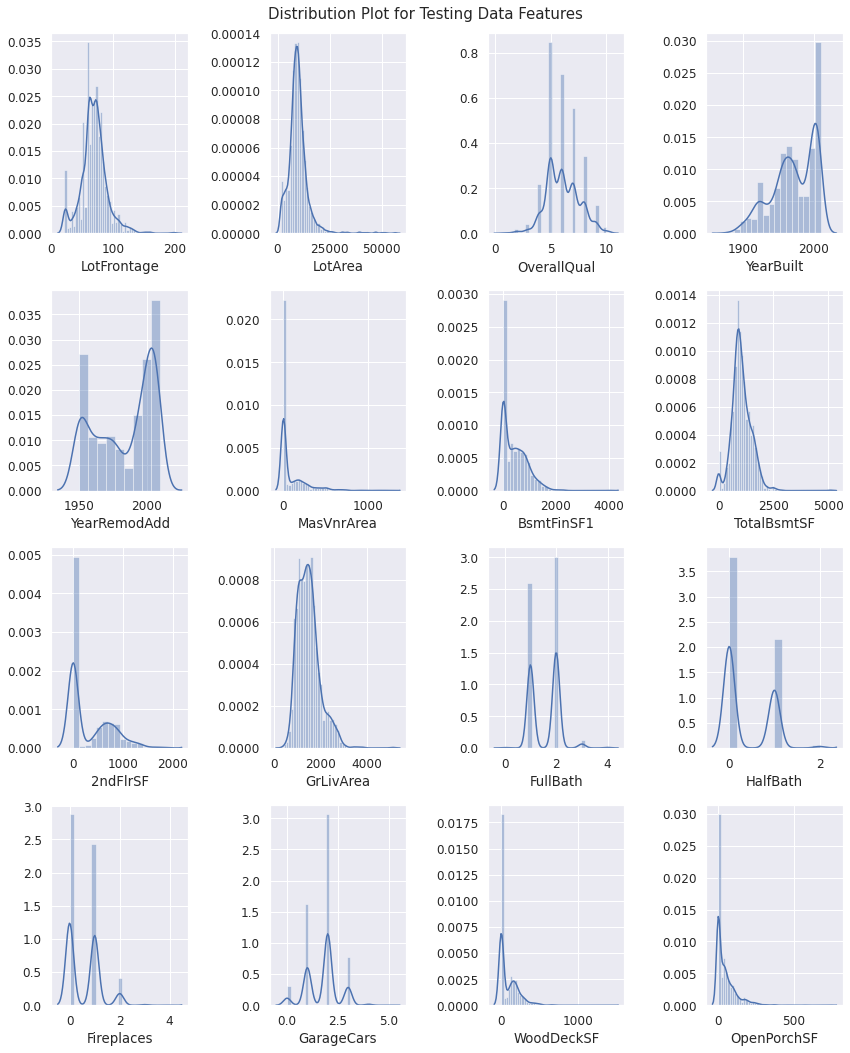

In [49]:
#Numeric features inspection for skewness in testing dataset
num_distribution_plot = eda_process(test_df)
num_distribution_plot.num_features_distplot('Testing Data')

### 2.5 Establish a baseline

2.5.1 First step is to create a simple baseline using default parameters for all selected models.

In [50]:
#Create independent features dataframe for modelling
train_df_X = (train_df.drop(['SalePrice'], axis=1)).copy()

In [51]:
#Create dependent feature dataframe for modelling
train_df_Y = train_df.SalePrice

In [52]:
#Extract all categorical feature ready for encoding
train_df_X.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [53]:
train_df_X.select_dtypes(include=['object']).describe()

MSZoning LotShape Neighborhood HouseStyle Exterior1st MasVnrType  \
count      1454     1454         1454       1454        1454       1454   
unique        5        4           25          8          15          4   
top          RL      Reg        NAmes     1Story     VinylSd       None   
freq       1145      925          224        723         515        869   

       ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1 HeatingQC  \
count       1454       1454     1454         1454         1454      1454   
unique         4          6        5            5            7         5   
top           TA      PConc       TA           No          Unf        Ex   
freq         902        646      648          953          430       738   

       CentralAir KitchenQual FireplaceQu GarageType GarageFinish GarageQual  \
count        1454        1454        1454       1454         1454       1454   
unique          2           4           6          7            4          6   
top             Y          TA        None     Attchd          Unf         TA   
freq         1359         733         690        864          604       1305   

       GarageCond SaleType  
count        1454     1454  
unique          6        9  
top            TA       WD  
freq         1320     1262

Most machine learning models can only handle numerical values.

In order to get the data ready for modelling we will transform categorical features into individual binary feature using the dummy variable coding approach. 

In [54]:
#Encode categorical features
cat_variables = ['MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']

for var in cat_variables:
    dummies = pd.get_dummies(train_df_X[var], prefix=var)
    train_df_X = pd.concat([train_df_X, dummies], axis=1)
    train_df_X.drop([var], axis=1, inplace=True)

In [55]:
#Split training data
X_train, X_test, y_train, y_test = train_test_split(train_df_X, train_df_Y, test_size=0.20, random_state=5)

In [56]:
# create models
models_eval = []
#models_eval.append(('LinearRegression', lr()))
models_eval.append(('Lasso', Lasso(alpha=0.0005, random_state=5)))
models_eval.append(('RandomForest', rfregr(random_state=5)))
models_eval.append(('GradientBoosting', grbregr(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)))
models_eval.append(('Ridge', Ridge(alpha=0.002, random_state=5)))
                   
print(models_eval)

[('Lasso', Lasso(alpha=0.0005, random_state=5)), ('RandomForest', RandomForestRegressor(random_state=5)), ('GradientBoosting', GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=5)), ('Ridge', Ridge(alpha=0.002, random_state=5))]


Lasso: 17836.696356
RandomForest: 15712.661478
GradientBoosting: 15310.381441
Ridge: 17836.192690


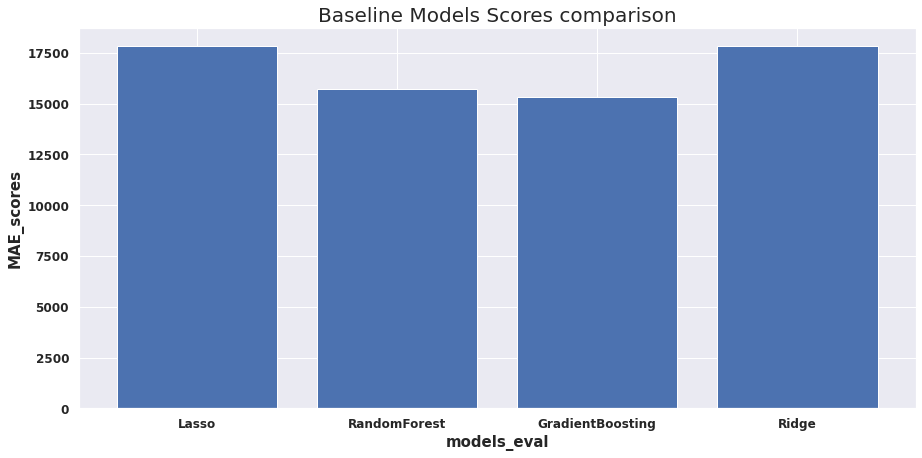

In [57]:
#Evaluate baseline models with default parameters
model_run1 = model(X_train, X_test, y_train, y_test)
model_run1.model_run(models_eval, 'Baseline')

With a baseline mean squared error established, our next task is to improve the scores and select the best model.

### 2.6 Hypothesize Solution

Considering the baseline model predictions are based on data provided without extensive feature generation or model tuning we will perform some feature engineering and cross validation to improve the scores before selecting the best model.

The SalePrice prediction expected output is a continuous value hence we will use from the suite of regression supervised learning algorithms. 

1. Ridge and Lasso Regression - powerful techniques for creating parsmonious models in the presence of a 'large' number of features.
2. Random Forest Regressor - improves the accuracy by reducing overfitting problem and the variance in decision trees.
3. GradientBoostingRegressor - typically produces best predictions because it can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.

## Part 3 - DEVELOP

### 3.1 Feature Engineering 

3.1.1 Create dataframe for independent features

In [58]:
#Create independent features dataframe for modelling
train_df1_X = (train_df.drop(['SalePrice'], axis=1)).copy()

3.1.2 Perform feature engineering on data to improve model performance

In [59]:
#Create dataframe for log transformed target variable
train_df_logY = np.log(train_df['SalePrice'])

In [60]:
#Convert some features to string datatype based on their description
train_df1_X['OverallQual'] = train_df1_X['OverallQual'].astype(str)

In [61]:
# Converting some of the categorical values to numeric ones. Choosing similar values for closer groups to balance linear relations...

hood_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

train_df1_X['Neighborhood'] = train_df1_X['Neighborhood'].map(hood_map).astype('int')

exterior_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_df1_X['ExterQual'] = train_df1_X['ExterQual'].map(exterior_map).astype('int')

bsmt_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_df1_X['BsmtQual'] = train_df1_X['BsmtQual'].map(bsmt_map).astype('int')
train_df1_X['FireplaceQu'] = train_df1_X['FireplaceQu'].map(bsmt_map).astype('int')
train_df1_X['GarageCond'] = train_df1_X['GarageCond'].map(bsmt_map).astype('int')
train_df1_X['GarageQual'] = train_df1_X['GarageQual'].map(bsmt_map).astype('int')

bsmtf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

train_df1_X['BsmtFinType1'] = train_df1_X['BsmtFinType1'].map(bsmtf_map).astype('int')

misc_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train_df1_X['HeatingQC'] = train_df1_X['HeatingQC'].map(misc_map).astype('int')
train_df1_X['KitchenQual'] = train_df1_X['KitchenQual'].map(misc_map).astype('int')

gar_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3,}
train_df1_X['GarageFinish'] = train_df1_X['GarageFinish'].map(gar_map).astype('int')

bsmtex_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
train_df1_X['BsmtExposure'] = train_df1_X['BsmtExposure'].map(bsmtex_map).astype('int')


In [62]:
#Create a feature for age of house using the YearBuilt feature and drop YearBuilt
now = datetime.datetime.now()
house_age = now.year - train_df1_X['YearBuilt']
train_df1_X['HouseAge'] = now.year - train_df1_X['YearBuilt']
train_df1_X = train_df1_X.drop('YearBuilt', axis=1)

In [63]:
#Extract all categorical feature ready for encoding
train_df1_X.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'HouseStyle', 'OverallQual', 'Exterior1st',
       'MasVnrType', 'Foundation', 'CentralAir', 'GarageType', 'SaleType'],
      dtype='object')

In [64]:
#Extract all numerical feature ready for encoding
train_df1_X.select_dtypes(exclude=['object']).columns

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'HouseAge'],
      dtype='object')

In [65]:
#Normalize numerical data in Training Dataset ready for modeling
features = ['LotFrontage', 'LotArea', 'Neighborhood', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'HouseAge']
train_norm = eda_process(train_df1_X)
train_norm.normalize(features)
train_df1_X = train_df1_X.drop(features, axis=1)
train_df1_X.describe()

LotFrontagenorm  LotAreanorm  Neighborhoodnorm  YearRemodAddnorm  \
count      1454.000000  1454.000000       1454.000000       1454.000000   
mean          0.383446     0.141991          0.449243          0.987480   
std           0.112508     0.077078          0.244688          0.010271   
min           0.115385     0.018372          0.100000          0.970149   
25%           0.329670     0.106503          0.300000          0.978607   
50%           0.384615     0.133668          0.500000          0.992040   
75%           0.439560     0.163173          0.500000          0.997015   
max           1.000000     1.000000          1.000000          1.000000   

       MasVnrAreanorm  ExterQualnorm  BsmtQualnorm  BsmtExposurenorm  \
count     1454.000000    1454.000000   1454.000000       1454.000000   
mean         0.064018       0.679092      0.697387          0.405089   
std          0.112344       0.114666      0.175377          0.264663   
min          0.000000       0.400000      0.000000          0.000000   
25%          0.000000       0.600000      0.600000          0.250000   
50%          0.000000       0.600000      0.800000          0.250000   
75%          0.102344       0.800000      0.800000          0.500000   
max          1.000000       1.000000      1.000000          1.000000   

       BsmtFinType1norm  BsmtFinSF1norm  ...  KitchenQualnorm  Fireplacesnorm  \
count       1454.000000     1454.000000  ...      1454.000000     1454.000000   
mean           0.589867        0.193925  ...         0.702063        0.202430   
std            0.351405        0.192316  ...         0.132668        0.212905   
min            0.000000        0.000000  ...         0.400000        0.000000   
25%            0.166667        0.000000  ...         0.600000        0.000000   
50%            0.666667        0.168363  ...         0.600000        0.333333   
75%            1.000000        0.313053  ...         0.800000        0.333333   
max            1.000000        1.000000  ...         1.000000        1.000000   

       FireplaceQunorm  GarageFinishnorm  GarageCarsnorm  GarageQualnorm  \
count      1454.000000       1454.000000     1454.000000     1454.000000   
mean          0.363549          0.571068        0.441541        0.561898   
std           0.362096          0.297501        0.187177        0.144857   
min           0.000000          0.000000        0.000000        0.000000   
25%           0.000000          0.333333        0.250000        0.600000   
50%           0.400000          0.666667        0.500000        0.600000   
75%           0.800000          0.666667        0.500000        0.600000   
max           1.000000          1.000000        1.000000        1.000000   

       GarageCondnorm  WoodDeckSFnorm  OpenPorchSFnorm  HouseAgenorm  
count     1454.000000     1454.000000      1454.000000   1454.000000  
mean         0.561623        0.109410         0.085103      0.329269  
std          0.144213        0.145094         0.120717      0.204362  
min          0.000000        0.000000         0.000000      0.067568  
25%          0.600000        0.000000         0.000000      0.135135  
50%          0.600000        0.000000         0.045704      0.317568  
75%          0.600000        0.196033         0.124314      0.445946  
max          1.000000        1.000000         1.000000      1.000000  

[8 rows x 26 columns]

In [66]:
#Encode categorical features
cat_variables = ['MSZoning', 'LotShape', 'HouseStyle', 'OverallQual', 'Exterior1st',
       'MasVnrType', 'Foundation', 'CentralAir', 'GarageType', 'SaleType']

for var in cat_variables:
    dummies = pd.get_dummies(train_df1_X[var], prefix=var)
    train_df1_X = pd.concat([train_df1_X, dummies], axis=1)
    train_df1_X.drop([var], axis=1, inplace=True)
train_df1_X.describe()

LotFrontagenorm  LotAreanorm  Neighborhoodnorm  YearRemodAddnorm  \
count      1454.000000  1454.000000       1454.000000       1454.000000   
mean          0.383446     0.141991          0.449243          0.987480   
std           0.112508     0.077078          0.244688          0.010271   
min           0.115385     0.018372          0.100000          0.970149   
25%           0.329670     0.106503          0.300000          0.978607   
50%           0.384615     0.133668          0.500000          0.992040   
75%           0.439560     0.163173          0.500000          0.997015   
max           1.000000     1.000000          1.000000          1.000000   

       MasVnrAreanorm  ExterQualnorm  BsmtQualnorm  BsmtExposurenorm  \
count     1454.000000    1454.000000   1454.000000       1454.000000   
mean         0.064018       0.679092      0.697387          0.405089   
std          0.112344       0.114666      0.175377          0.264663   
min          0.000000       0.400000      0.000000          0.000000   
25%          0.000000       0.600000      0.600000          0.250000   
50%          0.000000       0.600000      0.800000          0.250000   
75%          0.102344       0.800000      0.800000          0.500000   
max          1.000000       1.000000      1.000000          1.000000   

       BsmtFinType1norm  BsmtFinSF1norm  ...  GarageType_None  SaleType_COD  \
count       1454.000000     1454.000000  ...      1454.000000   1454.000000   
mean           0.589867        0.193925  ...         0.055708      0.029574   
std            0.351405        0.192316  ...         0.229437      0.169466   
min            0.000000        0.000000  ...         0.000000      0.000000   
25%            0.166667        0.000000  ...         0.000000      0.000000   
50%            0.666667        0.168363  ...         0.000000      0.000000   
75%            1.000000        0.313053  ...         0.000000      0.000000   
max            1.000000        1.000000  ...         1.000000      1.000000   

       SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
count   1454.000000   1454.000000     1454.000000     1454.000000   
mean       0.002751      0.001376        0.006190        0.003439   
std        0.052396      0.037075        0.078459        0.058560   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      0.000000        0.000000        0.000000   
50%        0.000000      0.000000        0.000000        0.000000   
75%        0.000000      0.000000        0.000000        0.000000   
max        1.000000      1.000000        1.000000        1.000000   

       SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
count     1454.000000   1454.000000   1454.000000  1454.000000  
mean         0.003439      0.083219      0.002063     0.867950  
std          0.058560      0.276308      0.045392     0.338661  
min          0.000000      0.000000      0.000000     0.000000  
25%          0.000000      0.000000      0.000000     1.000000  
50%          0.000000      0.000000      0.000000     1.000000  
75%          0.000000      0.000000      0.000000     1.000000  
max          1.000000      1.000000      1.000000     1.000000  

[8 rows x 96 columns]

In [67]:
#Split training data
X1_train, X1_test, y1_train, y1_test = train_test_split(train_df1_X, train_df_logY, test_size=0.20, random_state=5)

### 3.2 Models Hyperparameter tuning

3.2.1 Lasso Model Hyperparameter tuning

In [69]:
lasso_params = {'alpha':[1e-3, 1e-2, 1, 2, 5, 7, 10]}

model = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_absolute_error')
model.fit(X1_train, y1_train)

print(model.best_params_)
print(model.best_score_)

{'alpha': 0.001}
-0.09829875361489995


3.2.2 Ridge Model Hyperparameter tuning

In [70]:
ridge_params = {'alpha':[1e-3, 1e-2, 1, 2, 5, 7, 10, 20, 30, 40]}

model = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_absolute_error')
model.fit(X1_train, y1_train)

print(model.best_params_)
print(model.best_score_)

{'alpha': 0.001}
-0.09555635708959828


3.2.3 Random Forest Model Hyperparameter tuning

In [71]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = rfregr(n_estimators = 100, random_state = 42)
base_model.fit(X1_train, y1_train)
base_accuracy = evaluate(base_model, X1_test, y1_test)

Model Performance
Average Error: 0.0880 degrees.
Accuracy = 99.26%.


In [72]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70, 80, 100],
    'max_features': ["auto", None, "sqrt", "log2"],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [10, 20, 30, 40, 50],
    'n_estimators': [400, 600, 800, 1000]
}
# Create a based model
base_rf = rfregr()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = base_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [73]:
# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)
grid_search.best_params_

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 90.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 112.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 132.3min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 157.6min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 193.8min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 199.6min finished


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 800}

In [74]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X1_test, y1_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0894 degrees.
Accuracy = 99.25%.
Improvement of -0.01%.


3.2.4 Gradient Boost Model Hyperparameter tuning

In [75]:
def select_params(X1_train, y1_train, X1_test, y1_test, max_estimators=1000, max_depth = 3, learning_rate=0.01, min_samples_leaf=20):

    #feature_train, feature_tune, target_train, target_tune = train_test_split(model_data[features], model_data['salary'], test_size=0.33, random_state=0, shuffle=True)
    
    gbm = grbregr(n_estimators = max_estimators, learning_rate=learning_rate, 
                                    max_depth=max_depth, loss='ls', subsample=1.0, min_samples_leaf=min_samples_leaf)

    gbm.fit(X1_train, y1_train)

    test_score = np.zeros(max_estimators)

    for i, y_pred in enumerate(gbm.staged_predict(X1_test)):
        test_score[i] = mse(y1_test, y_pred)
        
    print('optimal number of trees: {0}'.format(test_score.argmin()))
    print('best MSE: {0}'.format(test_score.min()))
    # print('baseline MSE: {0}'.format(mse(target_tune, target_train.median())))
    pd.Series(test_score).plot(title='learning curve for max_depth = {0}'.format(max_depth))
    plt.show()

***** training for max depth = 1 *****
optimal number of trees: 39
best MSE: 0.03012871722185366


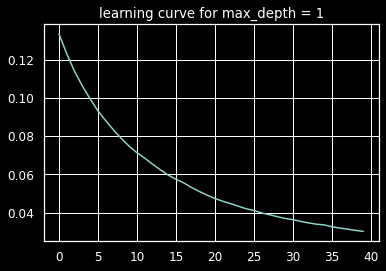

***** training for max depth = 2 *****
optimal number of trees: 39
best MSE: 0.019200927095536665


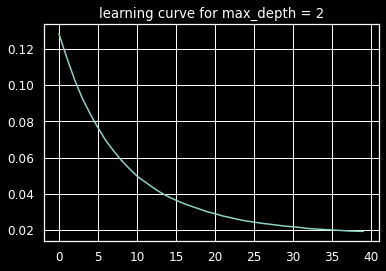

***** training for max depth = 4 *****
optimal number of trees: 39
best MSE: 0.01577575935390158


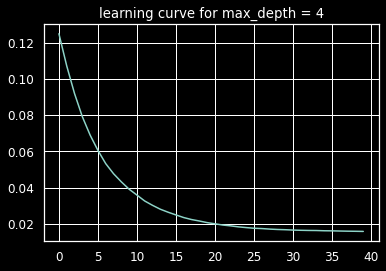

***** training for max depth = 6 *****
optimal number of trees: 39
best MSE: 0.016501785993135815


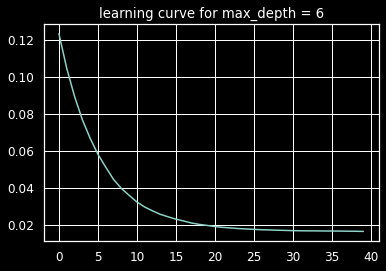

***** training for max depth = 8 *****
optimal number of trees: 39
best MSE: 0.01737063201450575


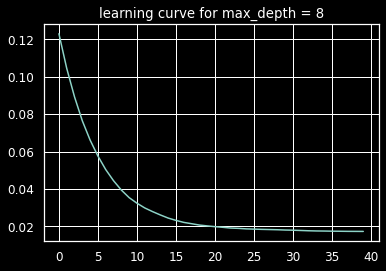

***** training for max depth = 10 *****
optimal number of trees: 36
best MSE: 0.017017219941724473


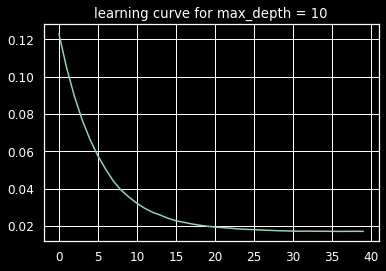

***** training for max depth = 12 *****
optimal number of trees: 39
best MSE: 0.016610009526623063


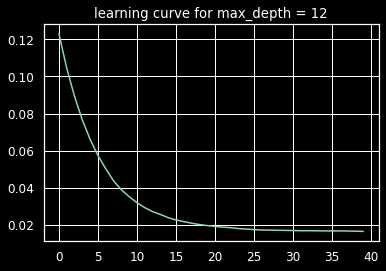

In [76]:
for depth in [1, 2, 4, 6, 8, 10, 12]:
    print('***** training for max depth = {0} *****'.format(depth))
    select_params(X1_train, y1_train, X1_test, y1_test, max_estimators=40, max_depth=depth, learning_rate=0.1)

Max Depth of 4 computes best MSE, next we tune for Max Estimator.

***** training for max estimators = 60 *****
optimal number of trees: 59
best MSE: 0.015304951485704021


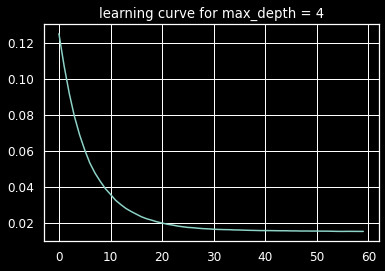

***** training for max estimators = 80 *****
optimal number of trees: 79
best MSE: 0.015153734214212422


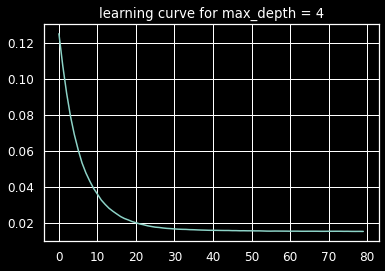

***** training for max estimators = 100 *****
optimal number of trees: 98
best MSE: 0.015107614811150081


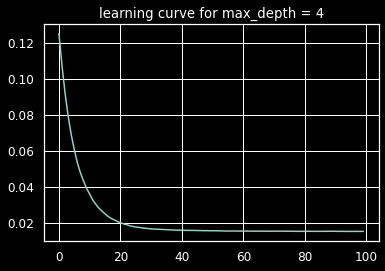

***** training for max estimators = 200 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


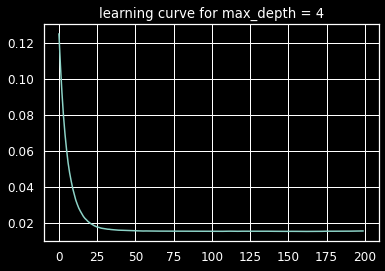

***** training for max estimators = 300 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


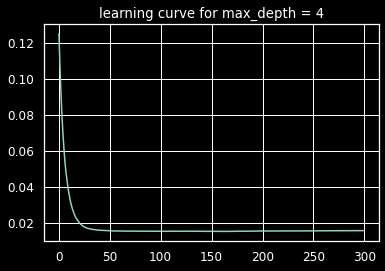

***** training for max estimators = 400 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


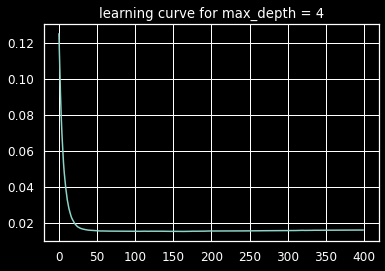

***** training for max estimators = 500 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


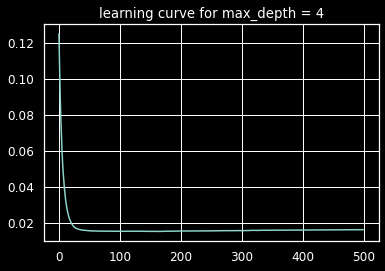

***** training for max estimators = 600 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


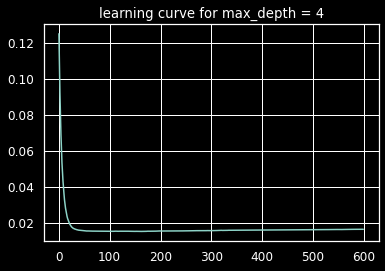

***** training for max estimators = 700 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


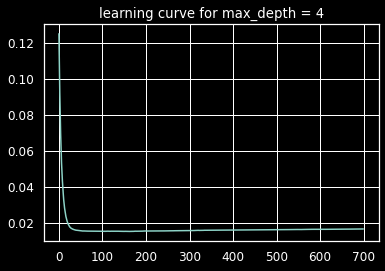

In [77]:
for max_e in [60, 80, 100, 200, 300, 400, 500, 600, 700]:
    print('***** training for max estimators = {0} *****'.format(max_e))
    select_params(X1_train, y1_train, X1_test, y1_test, max_estimators=max_e, max_depth=4, learning_rate=0.1)

Max Estimator of 200 computes best MSE, next we tune for learning rate.

***** training for learning_rate = 0.01 *****
optimal number of trees: 199
best MSE: 0.0213789437120877


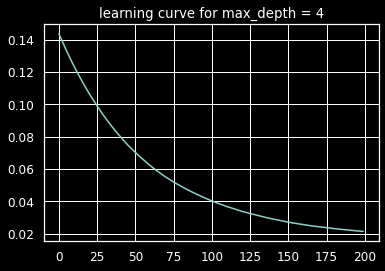

***** training for learning_rate = 0.02 *****
optimal number of trees: 199
best MSE: 0.016048183753101415


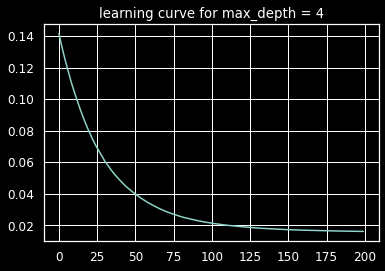

***** training for learning_rate = 0.03 *****
optimal number of trees: 199
best MSE: 0.015139082353006707


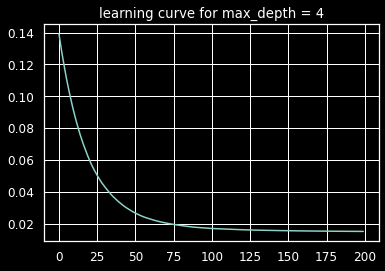

***** training for learning_rate = 0.04 *****
optimal number of trees: 191
best MSE: 0.015258192420107551


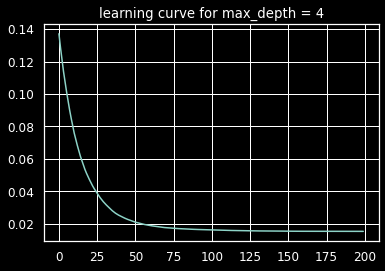

***** training for learning_rate = 0.05 *****
optimal number of trees: 152
best MSE: 0.015203644713455894


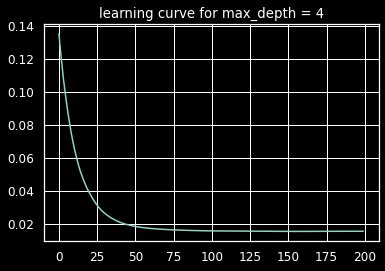

***** training for learning_rate = 0.06 *****
optimal number of trees: 169
best MSE: 0.014864364613802182


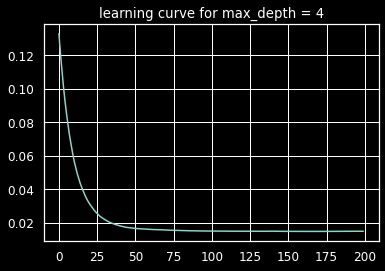

***** training for learning_rate = 0.07 *****
optimal number of trees: 124
best MSE: 0.01501700353430849


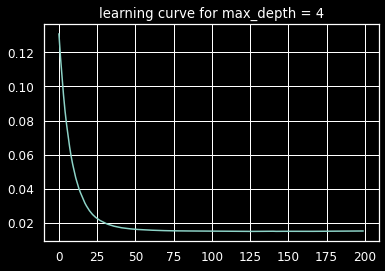

***** training for learning_rate = 0.08 *****
optimal number of trees: 116
best MSE: 0.01483268996370835


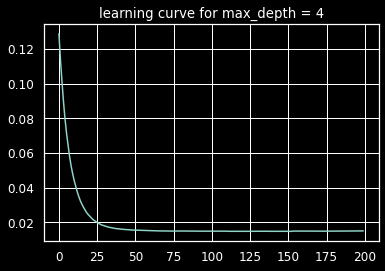

***** training for learning_rate = 0.09 *****
optimal number of trees: 91
best MSE: 0.015428368853127043


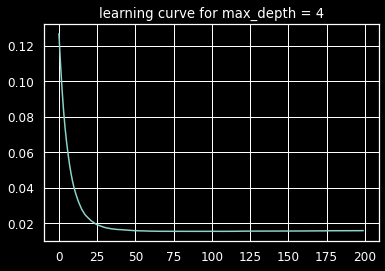

***** training for learning_rate = 0.1 *****
optimal number of trees: 162
best MSE: 0.015086387041017236


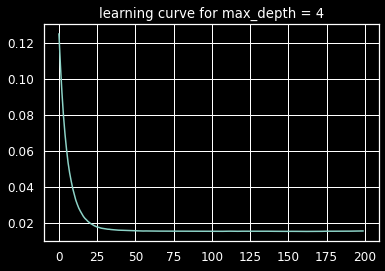

In [78]:
for learn_rate in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    print('***** training for learning_rate = {0} *****'.format(learn_rate))
    select_params(X1_train, y1_train, X1_test, y1_test, max_estimators=200, max_depth=4, learning_rate=learn_rate)

Learning rate of 0.08 computes best MSE.

***** training for min_sample_leaf = 6 *****
optimal number of trees: 92
best MSE: 0.015608161192022275


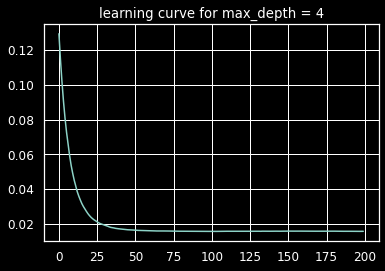

***** training for min_sample_leaf = 8 *****
optimal number of trees: 119
best MSE: 0.015180668598743214


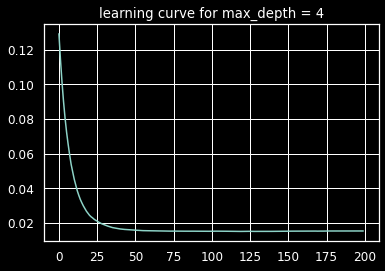

***** training for min_sample_leaf = 10 *****
optimal number of trees: 99
best MSE: 0.015696923495345953


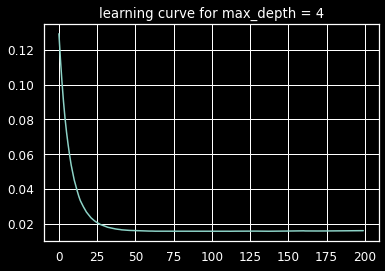

***** training for min_sample_leaf = 12 *****
optimal number of trees: 103
best MSE: 0.015101627963468693


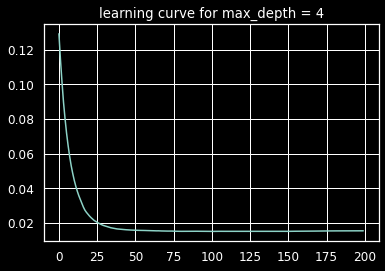

***** training for min_sample_leaf = 14 *****
optimal number of trees: 99
best MSE: 0.015444982477996104


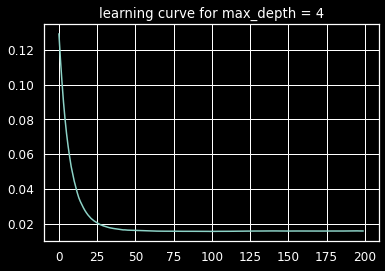

***** training for min_sample_leaf = 16 *****
optimal number of trees: 118
best MSE: 0.015737555278705493


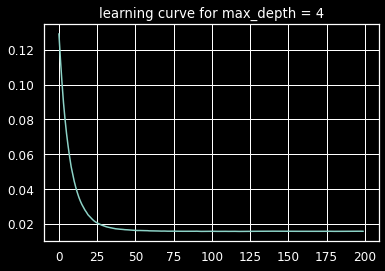

***** training for min_sample_leaf = 18 *****
optimal number of trees: 156
best MSE: 0.015022740835205701


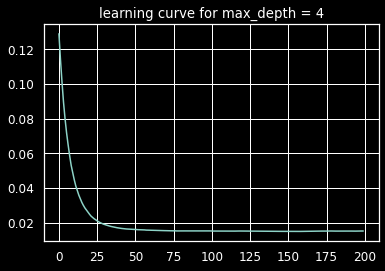

***** training for min_sample_leaf = 20 *****
optimal number of trees: 116
best MSE: 0.014812136256664027


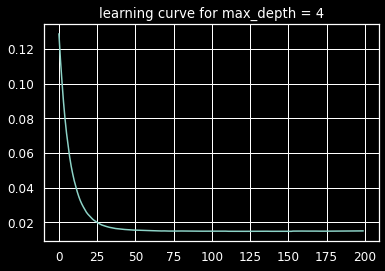

***** training for min_sample_leaf = 22 *****
optimal number of trees: 175
best MSE: 0.015286407681444378


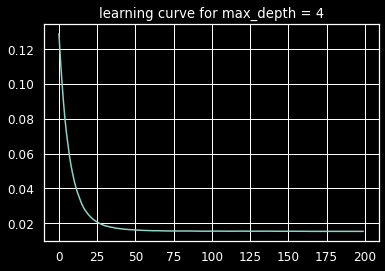

***** training for min_sample_leaf = 24 *****
optimal number of trees: 162
best MSE: 0.015142910295916957


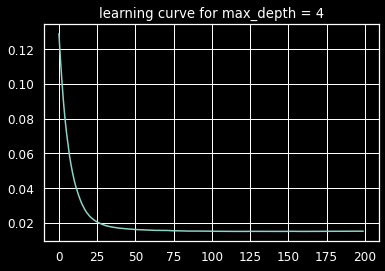

In [79]:
for msl in [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]:
    print('***** training for min_sample_leaf = {0} *****'.format(msl))
    select_params(X1_train, y1_train, X1_test, y1_test, max_estimators=200, max_depth=4, learning_rate=0.08, min_samples_leaf=msl)

Minimum Sample Leaf  of 20 computes best MSE.

### 3.3 Models Evaluation

3.3.1 Compile the selected models for evaluation

In [68]:
# create models
models_eval_hp = []
#models_eval_hp.append(('LinearRegression', lr()))
models_eval_hp.append(('Lasso', Lasso(alpha=0.01, random_state=5)))
models_eval_hp.append(('RandomForest', rfregr(random_state=5, n_estimators=800, max_depth=70, min_samples_split=10, max_features='auto', min_samples_leaf=1, bootstrap=True)))
models_eval_hp.append(('GradientBoosting', grbregr(n_estimators=200, learning_rate=0.08, max_depth=4, min_samples_split=2, min_samples_leaf=20, random_state=5)))
models_eval_hp.append(('Ridge', Ridge(alpha=0.01, random_state=5)))
                   
print(models_eval_hp)


[('Lasso', Lasso(alpha=0.01, random_state=5)), ('RandomForest', RandomForestRegressor(max_depth=70, min_samples_split=10, n_estimators=800,
                      random_state=5)), ('GradientBoosting', GradientBoostingRegressor(learning_rate=0.08, max_depth=4, min_samples_leaf=20,
                          n_estimators=200, random_state=5)), ('Ridge', Ridge(alpha=0.01, random_state=5))]


3.3.4 This function is to evaluate the models using the cross validation technique on the split feature training data

 25%|██▌       | 1/4 [00:00<00:00,  6.67it/s]

Lasso: 0.137592 (0.009113)


 50%|█████     | 2/4 [00:53<00:32, 16.23s/it]

RandomForest: 0.100751 (0.004465)


100%|██████████| 4/4 [01:01<00:00, 15.26s/it]

GradientBoosting: 0.097434 (0.005123)
Ridge: 0.095744 (0.006521)


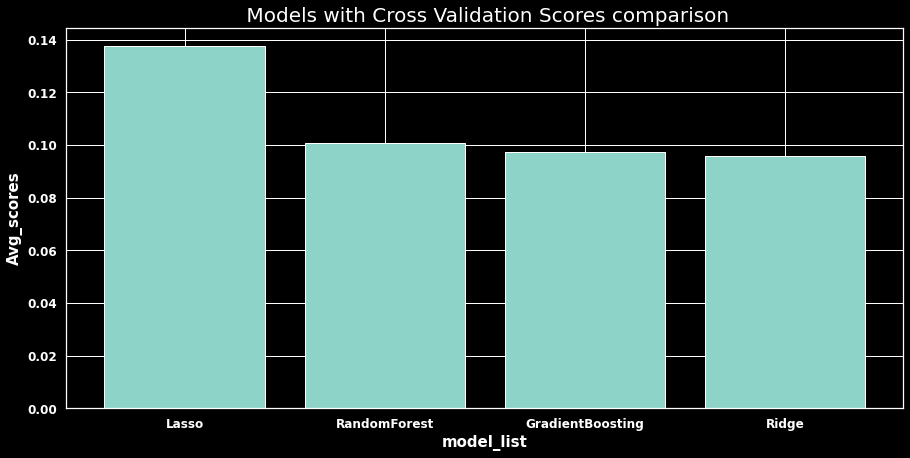

In [69]:
kfold = model(X1_train, X1_test, y1_train, y1_test)
kfold.cross_fold_val(models_eval_hp)

### 3.4 Models Testing

3.4.1 This function is to test the prediction from each model on the split feature testing data

Lasso: 0.129181
RandomForest: 0.089335
GradientBoosting: 0.089001
Ridge: 0.093270


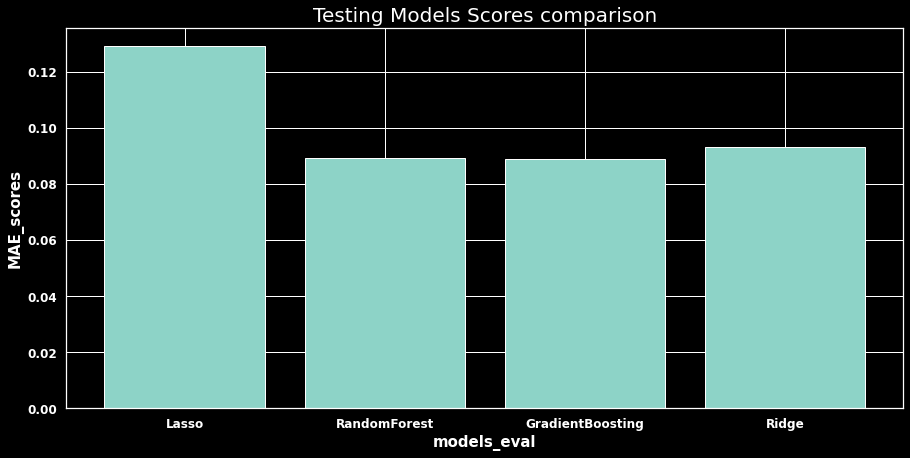

In [70]:
#Evaluate baseline models with default parameters
model_test = model(X1_train, X1_test, y1_train, y1_test)
model_test.model_run(models_eval_hp, 'Testing')

Findings :  Gradient Boost Regression has the best MAE value of 0.089001. Hence it will be used to predict the predict the test dataset.

### 3.5 Best Model Selection

In [71]:
bestModel = grbregr(n_estimators=200, learning_rate=0.08, max_depth=4, min_samples_split=2, min_samples_leaf=20, random_state=5)
bestModel

GradientBoostingRegressor(learning_rate=0.08, max_depth=4, min_samples_leaf=20,
                          n_estimators=200, random_state=5)

## Part 4 - DEPLOY

### 4.1 Train best model selected on the entire training data

4.1.2 The best model is fitted to the entire training data 

In [72]:
#Train best model on the whole training data
bestModel.fit(train_df1_X, train_df_logY)

GradientBoostingRegressor(learning_rate=0.08, max_depth=4, min_samples_leaf=20,
                          n_estimators=200, random_state=5)

### 4.2 Score the Test Dataset

4.2.1 Test data was inspected cleaned and explored in section 2 above. The data will undergo same encoding and feature engineering to match the shape of the train dataset.

In [73]:
#Create a feature for age of house using the YearBuilt feature and drop YearBuilt
now = datetime.datetime.now()
house_age = now.year - test_df['YearBuilt']
test_df['HouseAge'] = now.year - test_df['YearBuilt']
test_df = test_df.drop('YearBuilt', axis=1)

In [74]:
#Convert some features to string datatype based on their description
test_df['OverallQual'] = test_df['OverallQual'].astype(str)

In [75]:
# Converting some of the categorical values to numeric ones. Choosing similar values for closer groups to balance linear relations...

hood_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

test_df['Neighborhood'] = test_df['Neighborhood'].map(hood_map).astype('int')

exterior_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test_df['ExterQual'] = test_df['ExterQual'].map(exterior_map).astype('int')

bsmt_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test_df['BsmtQual'] = test_df['BsmtQual'].map(bsmt_map).astype('int')
test_df['FireplaceQu'] = test_df['FireplaceQu'].map(bsmt_map).astype('int')
test_df['GarageCond'] = test_df['GarageCond'].map(bsmt_map).astype('int')
test_df['GarageQual'] = test_df['GarageQual'].map(bsmt_map).astype('int')

bsmtf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

test_df['BsmtFinType1'] = test_df['BsmtFinType1'].map(bsmtf_map).astype('int')

misc_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test_df['HeatingQC'] = test_df['HeatingQC'].map(misc_map).astype('int')
test_df['KitchenQual'] = test_df['KitchenQual'].map(misc_map).astype('int')

gar_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3,}
test_df['GarageFinish'] = test_df['GarageFinish'].map(gar_map).astype('int')

bsmtex_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
test_df['BsmtExposure'] = test_df['BsmtExposure'].map(bsmtex_map).astype('int')


In [76]:
#Extract all categorical feature ready for encoding
test_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'HouseStyle', 'OverallQual', 'Exterior1st',
       'MasVnrType', 'Foundation', 'CentralAir', 'GarageType', 'SaleType'],
      dtype='object')

In [77]:
#Extract all numerical features ready for normalization
test_df.select_dtypes(exclude=['object']).columns

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'HouseAge'],
      dtype='object')

In [78]:
#Encode categorical features in Testing Data
cat_variables = ['MSZoning', 'LotShape', 'HouseStyle', 'OverallQual', 'Exterior1st',
       'MasVnrType', 'Foundation', 'CentralAir', 'GarageType', 'SaleType']

for var in cat_variables:
    dummies = pd.get_dummies(test_df[var], prefix=var)
    test_df = pd.concat([test_df, dummies], axis=1)
    test_df.drop([var], axis=1, inplace=True)

In [79]:
#Normalize numerical data in Testing Dataset ready for modeling
features = ['LotFrontage', 'LotArea', 'Neighborhood', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'HouseAge']
test_norm = eda_process(test_df)
test_norm.normalize(features)
test_df = test_df.drop(features, axis=1)
test_df.describe()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count       1459.000000   1459.00000  1459.000000  1459.000000  1459.000000   
mean           0.010281      0.05072     0.006854     0.766278     0.165867   
std            0.100907      0.21950     0.082533     0.423342     0.372089   
min            0.000000      0.00000     0.000000     0.000000     0.000000   
25%            0.000000      0.00000     0.000000     1.000000     0.000000   
50%            0.000000      0.00000     0.000000     1.000000     0.000000   
75%            0.000000      0.00000     0.000000     1.000000     0.000000   
max            1.000000      1.00000     1.000000     1.000000     1.000000   

       LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
count   1459.000000   1459.000000   1459.000000   1459.000000   
mean       0.331734      0.023989      0.004112      0.640164   
std        0.470997      0.153067      0.064018      0.480117   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000   
75%        1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       HouseStyle_1.5Fin  ...  KitchenQualnorm  Fireplacesnorm  \
count        1459.000000  ...      1459.000000     1459.000000   
mean            0.109664  ...         0.701988        0.145305   
std             0.312578  ...         0.132156        0.161855   
min             0.000000  ...         0.400000        0.000000   
25%             0.000000  ...         0.600000        0.000000   
50%             0.000000  ...         0.600000        0.000000   
75%             0.000000  ...         0.800000        0.250000   
max             1.000000  ...         1.000000        1.000000   

       FireplaceQunorm  GarageFinishnorm  GarageCarsnorm  GarageQualnorm  \
count      1459.000000       1459.000000     1459.000000      1459.00000   
mean          0.342152          0.572081        0.352981         0.69791   
std           0.360229          0.300703        0.155411         0.17722   
min           0.000000          0.000000        0.000000         0.00000   
25%           0.000000          0.333333        0.200000         0.75000   
50%           0.000000          0.666667        0.400000         0.75000   
75%           0.800000          1.000000        0.400000         0.75000   
max           1.000000          1.000000        1.000000         1.00000   

       GarageCondnorm  WoodDeckSFnorm  OpenPorchSFnorm  HouseAgenorm  
count     1459.000000     1459.000000      1459.000000   1459.000000  
mean         0.561755        0.065432         0.065113      0.344980  
std          0.141096        0.089708         0.092835      0.215532  
min          0.000000        0.000000         0.000000      0.070922  
25%          0.600000        0.000000         0.000000      0.134752  
50%          0.600000        0.000000         0.037736      0.333333  
75%          0.600000        0.117978         0.097035      0.475177  
max          1.000000        1.000000         1.000000      1.000000  

[8 rows x 93 columns]

In [80]:
train_df1_X.describe()

LotFrontagenorm  LotAreanorm  Neighborhoodnorm  YearRemodAddnorm  \
count      1454.000000  1454.000000       1454.000000       1454.000000   
mean          0.383446     0.141991          0.449243          0.987480   
std           0.112508     0.077078          0.244688          0.010271   
min           0.115385     0.018372          0.100000          0.970149   
25%           0.329670     0.106503          0.300000          0.978607   
50%           0.384615     0.133668          0.500000          0.992040   
75%           0.439560     0.163173          0.500000          0.997015   
max           1.000000     1.000000          1.000000          1.000000   

       MasVnrAreanorm  ExterQualnorm  BsmtQualnorm  BsmtExposurenorm  \
count     1454.000000    1454.000000   1454.000000       1454.000000   
mean         0.064018       0.679092      0.697387          0.405089   
std          0.112344       0.114666      0.175377          0.264663   
min          0.000000       0.400000      0.000000          0.000000   
25%          0.000000       0.600000      0.600000          0.250000   
50%          0.000000       0.600000      0.800000          0.250000   
75%          0.102344       0.800000      0.800000          0.500000   
max          1.000000       1.000000      1.000000          1.000000   

       BsmtFinType1norm  BsmtFinSF1norm  ...  GarageType_None  SaleType_COD  \
count       1454.000000     1454.000000  ...      1454.000000   1454.000000   
mean           0.589867        0.193925  ...         0.055708      0.029574   
std            0.351405        0.192316  ...         0.229437      0.169466   
min            0.000000        0.000000  ...         0.000000      0.000000   
25%            0.166667        0.000000  ...         0.000000      0.000000   
50%            0.666667        0.168363  ...         0.000000      0.000000   
75%            1.000000        0.313053  ...         0.000000      0.000000   
max            1.000000        1.000000  ...         1.000000      1.000000   

       SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
count   1454.000000   1454.000000     1454.000000     1454.000000   
mean       0.002751      0.001376        0.006190        0.003439   
std        0.052396      0.037075        0.078459        0.058560   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      0.000000        0.000000        0.000000   
50%        0.000000      0.000000        0.000000        0.000000   
75%        0.000000      0.000000        0.000000        0.000000   
max        1.000000      1.000000        1.000000        1.000000   

       SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
count     1454.000000   1454.000000   1454.000000  1454.000000  
mean         0.003439      0.083219      0.002063     0.867950  
std          0.058560      0.276308      0.045392     0.338661  
min          0.000000      0.000000      0.000000     0.000000  
25%          0.000000      0.000000      0.000000     1.000000  
50%          0.000000      0.000000      0.000000     1.000000  
75%          0.000000      0.000000      0.000000     1.000000  
max          1.000000      1.000000      1.000000     1.000000  

[8 rows x 96 columns]

4.2.2 Test data encoded using funtion defined in section 4.2.1 above.

In [81]:
#Ensure training and testing data have the same number of columns
for i in list(train_df1_X):
    if i not in list(test_df):
        test_df[i] = 0

In [82]:
test_df.describe()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count       1459.000000   1459.00000  1459.000000  1459.000000  1459.000000   
mean           0.010281      0.05072     0.006854     0.766278     0.165867   
std            0.100907      0.21950     0.082533     0.423342     0.372089   
min            0.000000      0.00000     0.000000     0.000000     0.000000   
25%            0.000000      0.00000     0.000000     1.000000     0.000000   
50%            0.000000      0.00000     0.000000     1.000000     0.000000   
75%            0.000000      0.00000     0.000000     1.000000     0.000000   
max            1.000000      1.00000     1.000000     1.000000     1.000000   

       LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
count   1459.000000   1459.000000   1459.000000   1459.000000   
mean       0.331734      0.023989      0.004112      0.640164   
std        0.470997      0.153067      0.064018      0.480117   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000   
75%        1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       HouseStyle_1.5Fin  ...  GarageFinishnorm  GarageCarsnorm  \
count        1459.000000  ...       1459.000000     1459.000000   
mean            0.109664  ...          0.572081        0.352981   
std             0.312578  ...          0.300703        0.155411   
min             0.000000  ...          0.000000        0.000000   
25%             0.000000  ...          0.333333        0.200000   
50%             0.000000  ...          0.666667        0.400000   
75%             0.000000  ...          1.000000        0.400000   
max             1.000000  ...          1.000000        1.000000   

       GarageQualnorm  GarageCondnorm  WoodDeckSFnorm  OpenPorchSFnorm  \
count      1459.00000     1459.000000     1459.000000      1459.000000   
mean          0.69791        0.561755        0.065432         0.065113   
std           0.17722        0.141096        0.089708         0.092835   
min           0.00000        0.000000        0.000000         0.000000   
25%           0.75000        0.600000        0.000000         0.000000   
50%           0.75000        0.600000        0.000000         0.037736   
75%           0.75000        0.600000        0.117978         0.097035   
max           1.00000        1.000000        1.000000         1.000000   

       HouseAgenorm  HouseStyle_2.5Fin  Exterior1st_ImStucc  Exterior1st_Stone  
count   1459.000000             1459.0               1459.0             1459.0  
mean       0.344980                0.0                  0.0                0.0  
std        0.215532                0.0                  0.0                0.0  
min        0.070922                0.0                  0.0                0.0  
25%        0.134752                0.0                  0.0                0.0  
50%        0.333333                0.0                  0.0                0.0  
75%        0.475177                0.0                  0.0                0.0  
max        1.000000                0.0                  0.0                0.0  

[8 rows x 96 columns]

4.2.4 Salary predictions based on test data features are generated using the selected best model

In [83]:
SalePrice_predictions = bestModel.predict(test_df)
SalePrice_predictions

array([11.35408826, 11.24475005, 11.89775011, ..., 11.2060647 ,
       11.18877625, 11.74884477])

4.2.5 Combine the test data 'Id' and the predicted SalePrice into a dataframe

In [84]:
#Create a dataframe for the Test Data Id and the predicted SalePrice
result = pd.DataFrame({'Id' : test_df_init.Id, 'SalePrice' : np.exp(SalePrice_predictions)})

In [85]:
result.head(20)

Id      SalePrice
0   1461   85313.523185
1   1462   76477.361515
2   1463  146935.664224
3   1464  144473.892385
4   1465   75098.486064
5   1466  147647.289528
6   1467   76711.016987
7   1468  147232.427731
8   1469   73518.913885
9   1470   80246.090468
10  1471   89208.119404
11  1472   93008.069173
12  1473   91568.546577
13  1474  116640.751042
14  1475   73413.458156
15  1476  137942.461306
16  1477   78117.774980
17  1478   63267.303580
18  1479   75447.106001
19  1480   64861.088449

In [86]:
#Updating the test dataset with the additional 'predisted_salary' column
test_df_init['SalePrice'] = (np.exp(SalePrice_predictions)).tolist()

In [87]:
test_df_init.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition      SalePrice  
0      6   2010        WD         Normal   85313.523185  
1      6   2010        WD         Normal   76477.361515  
2      3   2010        WD         Normal  146935.664224  
3      6   2010        WD         Normal  144473.892385  
4      1   2010        WD         Normal   75098.486064  

[5 rows x 81 columns]

4.2.6 Export the final dataset to a csv file

In [88]:
#Exporting the final predicted dataset to a csv file
result.to_csv('submission.csv')

### 4.3 Feature Importance

4.3.1 Generate and plot the sorted feature importance data.

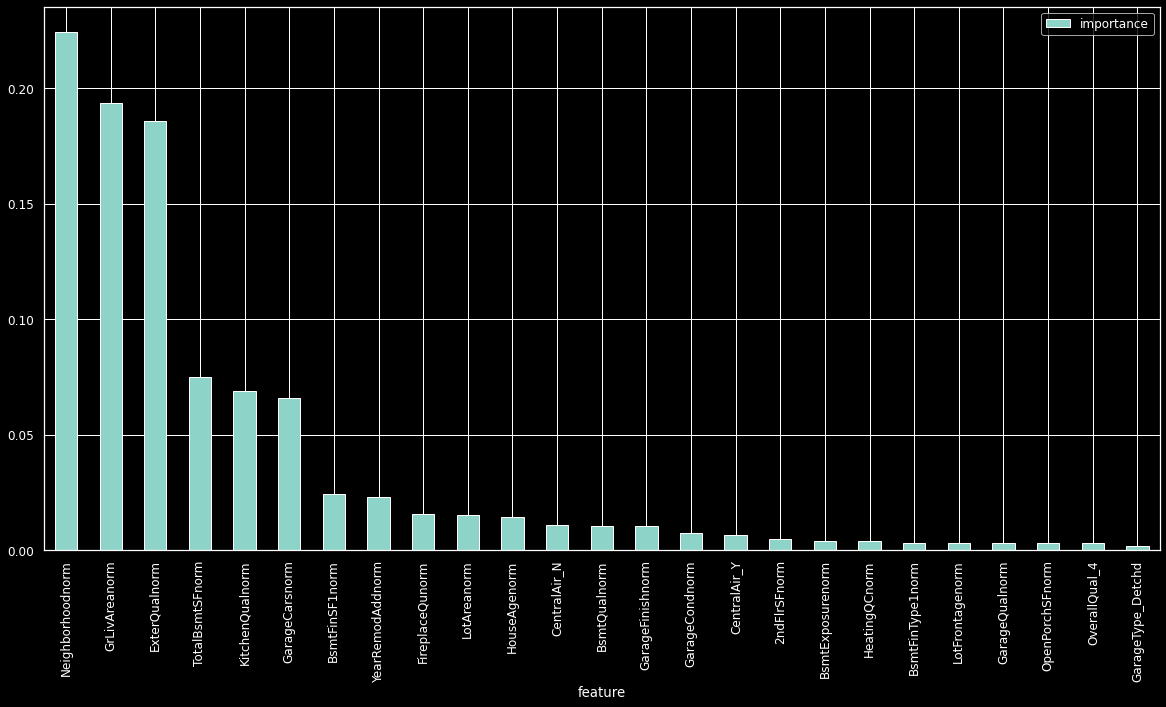

In [89]:
# store feature importances

if hasattr(bestModel, 'feature_importances_'):
    importances = bestModel.feature_importances_

else:
    # for linear models which don't have feature_importances_
    importances = [0]*len(train_df1_X.columns)

feature_importances = pd.DataFrame({'feature':train_df1_X.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    
# set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)
    
# create plot
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

Findings :  Plot shows the importance of each feature in the prediction of the SalePrice. HouseAge, GrLivArea & GarageCars are the top 3 features.

### 4.4 Summarize the predicted Salaries

We'll skip this step since we don't have the outcomes for the test data

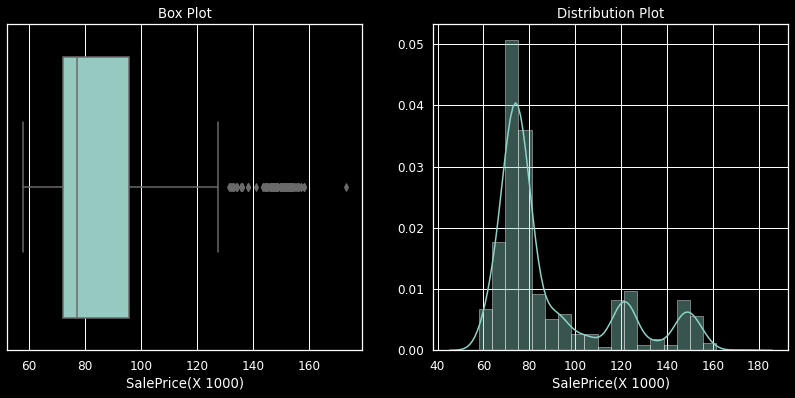

In [90]:
#Visualize target variable data 
Result_plot = eda_process(result.SalePrice)
Result_plot.target_visual('SalePrice')

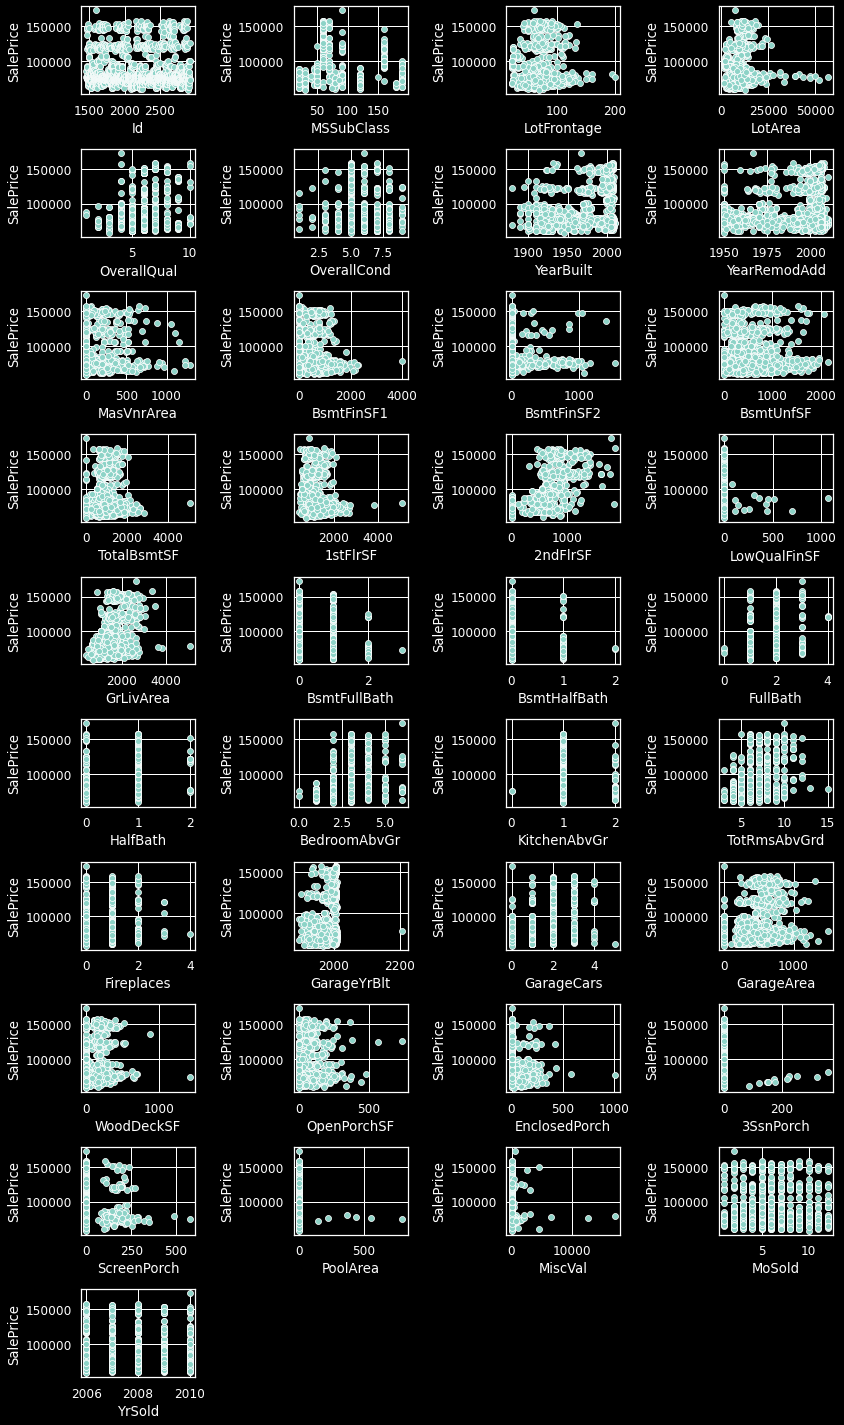

In [91]:
#Numeric features inspection for outliers
num_bivariate_plot = eda_process(test_df_init)
num_bivariate_plot.num_features_outliers()

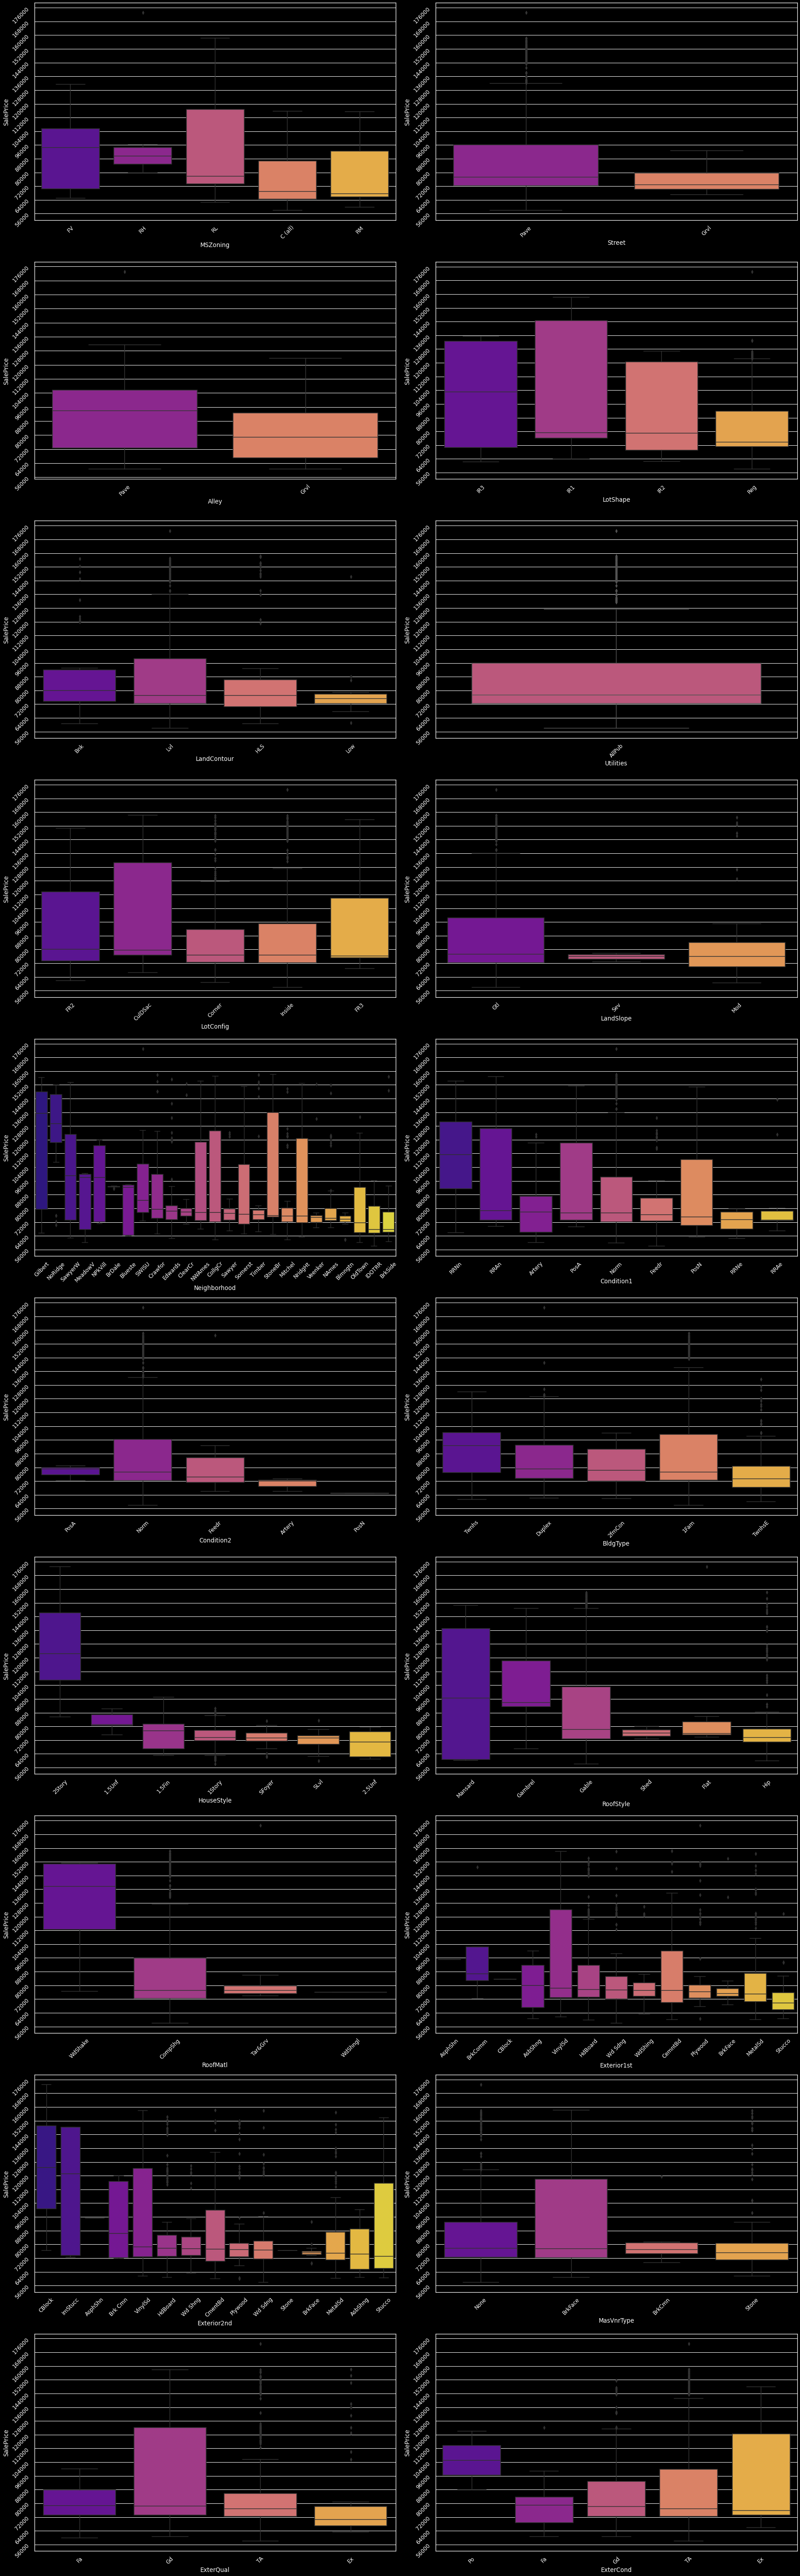

In [92]:
#Plot to inspect relationshop between categorical features and SalePrice
cat_plot = eda_process(test_df_init)
cat_plot.cat_features_plot('SalePrice')